In [ ]:
!pip install -qq tabulate

In [6]:
from tabulate import tabulate
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.linear_model import ElasticNet,Lasso,LogisticRegression,PassiveAggressiveClassifier,Perceptron,RidgeClassifier,SGDClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier,NearestCentroid
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import time
import warnings
warnings.filterwarnings("ignore")
from pprint import pprint
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
chess_df=pd.read_csv('games.csv')
print(chess_df.shape)

(20058, 16)


In [ ]:
def plot_countplot(dt:pd.DataFrame='',c_name:str='',y_label:str='',fgsize:tuple=(6,4))->None:
  if y_label=='':
    plt.figure(figsize=fgsize)
    sns.countplot(dt[c_name])
    plt.title(f'Count Plot of {c_name}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
  else:
    plt.figure(figsize=fgsize)
    sns.countplot(x=c_name,hue=y_label,data=dt)
    plt.title(f'Countplot of {c_name}')
    plt.tight_layout()
    plt.show()
  return None

def plot_histogram(df:np.ndarray='',c_name:str='',bin:int=20,fgsize:tuple=(6,4))->None:
  plt.figure(figsize=fgsize)
  sns.histplot(df,bins=bin,kde=True)
  plt.title(f'Histogram of {c_name}')
  plt.tight_layout()
  plt.show()
  return None

def plot_boxplot(df:np.ndarray='',c_name:str='',fgsize:tuple=(6,4))->None:
  plt.figure(figsize=fgsize)
  sns.boxplot(df)
  plt.title(f'Boxplot of {c_name}')
  plt.xlabel(c_name)
  plt.tight_layout()
  plt.show()
  return None

def plot_barplot(dt:pd.DataFrame='',c_name:str='',y_label:str='',fgsize:tuple=(6,4))->None:
  plt.figure(figsize=fgsize)
  sns.barplot(x=y_label,y=c_name,data=dt)
  plt.title(f'Barplot of {c_name}')
  plt.tight_layout()
  plt.show()
  return None

def get_basic_eda(df:pd.DataFrame)->None:
  pprint("First row of the dataset:")
  pprint(df.iloc[0].to_dict())
  pprint('='*50)
  pprint("Shape of the dataset:")
  pprint(df.shape)
  pprint('='*50)
  pprint("Missing values:")
  pprint(df.isnull().sum())
  pprint('='*50)
  pprint("Data Info:")
  pprint(df.info())
  pprint('='*50)
  duplicate_rows=df[df.duplicated()].shape
  if duplicate_rows[0] > 0:
      pprint("Duplicate rows found!")
      pprint(duplicate_rows)
  else:
      pprint("No duplicate rows found.")
  del duplicate_rows
  pprint('='*50)
  return None

def plot_descriptive_statistics(df:pd.DataFrame='',descp_flag:bool=False,uni_variate_flag:bool=False,target_name:str='',bi_variate_flag:bool=False,fgsize:tuple=(6,4))->None:
  if descp_flag:
    pprint("Summary statistics:")
    for idx,row in df.describe(include='all').iterrows():
      print(idx+" : ")
      pprint(str({k:v for k,v in row.items() if str(v)!='nan'}))
      print()
    pprint('='*50)
  if uni_variate_flag:
    categorical_columns:list=list(df.select_dtypes(include=['object']).columns)
    if categorical_columns:
      pprint('*'*40)
      pprint("Uni-Variante Analysis")
      pprint('*'*40)
      pprint("Distribution of categorical variables:")
      for column in categorical_columns:
        temp_df=df[column].value_counts()
        if temp_df.shape[0]<10:
          pprint(f"\nDistribution of {column}:")
          pprint(temp_df)
          plot_countplot(dt=df,c_name=column,fgsize=fgsize)
          print()
        del temp_df
      pprint('='*50)
    numerical_columns:list=[x for x in df.columns if x not in categorical_columns]
    if numerical_columns:
      pprint('*'*40)
      pprint("Uni-Variante Analysis")
      pprint('*'*40)
      pprint("Distribution of numerical variables:")
      for column in numerical_columns:
        plot_histogram(df=df[column],c_name=column,bin=20,fgsize=fgsize)
        plot_boxplot(df=df[column],c_name=column,fgsize=fgsize)
      pprint('='*50)
  if bi_variate_flag:
    categorical_columns:list=list(df.select_dtypes(include=['object']).columns)
    numerical_columns:list=[x for x in df.columns if x not in categorical_columns]
    if numerical_columns:
      pprint('*'*40)
      pprint("Bi-Variante Analysis")
      pprint('*'*40)
      pprint("Distribution of numerical variables:")
      for column in numerical_columns:
        plot_barplot(dt=df,c_name=column,y_label=target_name,fgsize=fgsize)
      pprint('='*50)
    if categorical_columns:
      pprint('*'*40)
      pprint("Bi-Variante Analysis")
      pprint('*'*40)
      pprint("Distribution of categorical variables:")
      for column in categorical_columns:
        plot_countplot(dt=df,c_name=column,y_label=target_name,fgsize=fgsize)
      pprint('='*50)
  return None

In [ ]:
get_basic_eda(df=chess_df)

'First row of the dataset:'
{'black_id': 'skinnerua',
 'black_rating': 1261,
 'created_at': 1504130000000.0,
 'game_time_duration': 0.0,
 'id': 'l1NXvwaE',
 'increment_code': '5+10',
 'last_move_at': 1504130000000.0,
 'moves': 'd4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6 Qe5+ Nxe5 c4 Bb4+',
 'opening_eco': 'B00',
 'opening_name': 'Nimzowitsch Defense: Kennedy Variation',
 'opening_ply': 4,
 'rated': True,
 'turns': 16,
 'victory_status': 'resign',
 'white_id': 'a-00',
 'white_rating': 1322,
 'winner': 'black'}
'=================================================='
'Shape of the dataset:'
(17114, 17)
'=================================================='
'Missing values:'
id                    0
rated                 0
created_at            0
last_move_at          0
turns                 0
victory_status        0
winner                0
increment_code        0
white_id              0
white_rating          0
black_id              0
black_rating          0
moves                 0
opening_e

In [ ]:
plot_descriptive_statistics(df=chess_df,descp_flag=True)

'Summary statistics:'
count : 
("{'id': 20058, 'rated': 20058, 'created_at': 20058.0, 'last_move_at': "
 "20058.0, 'turns': 20058.0, 'victory_status': 20058, 'winner': 20058, "
 "'increment_code': 20058, 'white_id': 20058, 'white_rating': 20058.0, "
 "'black_id': 20058, 'black_rating': 20058.0, 'moves': 20058, 'opening_eco': "
 "20058, 'opening_name': 20058, 'opening_ply': 20058.0}")

unique : 
("{'id': 19113, 'rated': 2, 'victory_status': 4, 'winner': 3, "
 "'increment_code': 400, 'white_id': 9438, 'black_id': 9331, 'moves': 18920, "
 "'opening_eco': 365, 'opening_name': 1477}")

top : 
("{'id': 'XRuQPSzH', 'rated': True, 'victory_status': 'resign', 'winner': "
 "'white', 'increment_code': '10+0', 'white_id': 'taranga', 'black_id': "
 "'taranga', 'moves': 'e4 e5', 'opening_eco': 'A00', 'opening_name': "
 '"Van\'t Kruijs Opening"}')

freq : 
("{'id': 5, 'rated': 16155, 'victory_status': 11147, 'winner': 10001, "
 "'increment_code': 7721, 'white_id': 72, 'black_id': 82, 'moves': 27, "
 

In [ ]:
chess_df=chess_df.drop_duplicates()
print(chess_df.shape)

(19629, 16)


In [ ]:
# filtering only for resign and check mate games and ignoring draw and out of time cases
chess_df=chess_df[chess_df['victory_status'].isin(['resign','mate'])]
print(chess_df.shape)

(17114, 16)


In [ ]:
plot_descriptive_statistics(df=chess_df,descp_flag=True)

'Summary statistics:'
count : 
("{'id': 17114, 'rated': 17114, 'created_at': 17114.0, 'last_move_at': "
 "17114.0, 'turns': 17114.0, 'victory_status': 17114, 'winner': 17114, "
 "'increment_code': 17114, 'white_id': 17114, 'white_rating': 17114.0, "
 "'black_id': 17114, 'black_rating': 17114.0, 'moves': 17114, 'opening_eco': "
 "17114, 'opening_name': 17114, 'opening_ply': 17114.0}")

unique : 
("{'id': 16669, 'rated': 2, 'victory_status': 2, 'winner': 2, "
 "'increment_code': 389, 'white_id': 8484, 'black_id': 8363, 'moves': 16520, "
 "'opening_eco': 353, 'opening_name': 1411}")

top : 
("{'id': 'YPVYpEvm', 'rated': True, 'victory_status': 'resign', 'winner': "
 "'white', 'increment_code': '10+0', 'white_id': 'bleda', 'black_id': "
 "'king5891', 'moves': 'e4 e5', 'opening_eco': 'A00', 'opening_name': "
 '"Van\'t Kruijs Opening"}')

freq : 
("{'id': 2, 'rated': 13822, 'victory_status': 10926, 'winner': 9000, "
 "'increment_code': 6544, 'white_id': 42, 'black_id': 38, 'moves': 20, "
 "'

###### Total duration of the game

In [ ]:
chess_df['game_time_duration']=chess_df['last_move_at'] - chess_df['created_at']

In [ ]:
plot_descriptive_statistics(df=chess_df[['game_time_duration']],descp_flag=True)

'Summary statistics:'
count : 
"{'game_time_duration': 17114.0}"

mean : 
"{'game_time_duration': 798963.8137781933}"

std : 
"{'game_time_duration': 4997286.6744319135}"

min : 
"{'game_time_duration': 0.0}"

25% : 
"{'game_time_duration': 0.0}"

50% : 
"{'game_time_duration': 194329.5}"

75% : 
"{'game_time_duration': 714374.0}"

max : 
"{'game_time_duration': 605844701.0}"

'=================================================='


In [ ]:
zero_games=chess_df[chess_df['game_time_duration']==0].shape[0]
print(f'Number of games that had zero duration: #{zero_games},which makes up {round(zero_games/chess_df.shape[0],2)*100}% of all games')
del zero_games

Number of games that had zero duration: #7547, which makes up 44.0% of all games


In [ ]:
chess_df[chess_df['game_time_duration']==0].head(1).T

,1
id,l1NXvwaE
rated,True
created_at,1504130000000.0
last_move_at,1504130000000.0
turns,16
victory_status,resign
winner,black
increment_code,5+10
white_id,a-00
white_rating,1322


In [28]:
def plot_bar(column, sort=False,title="All"):
    if sort:
        data_all=chess_df[column].value_counts().sort_index()
    else:
        data_all=chess_df[column].value_counts()
    plt.bar(data_all.index, data_all, color='yellow')
    plt.title(title)
    plt.show()

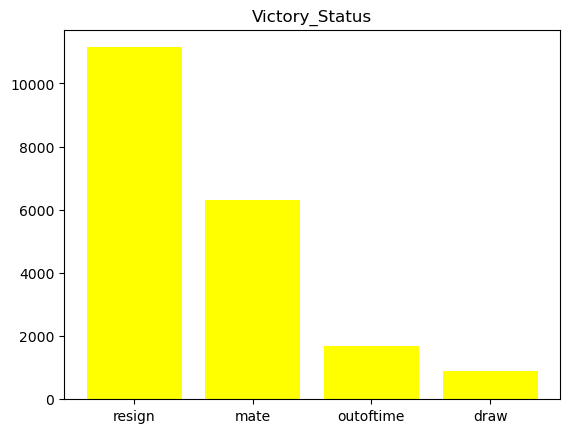

In [29]:
#victory_status
plot_bar('victory_status', title='Victory_Status')

In [11]:
colors=['purple','blue', 'pink','teal']
def plot_pie(column, title='All'):
    fig, axs=plt.subplots(1,1)
    d=chess_df[column].value_counts()
    plt.pie(d, labels=d.index, autopct='%1.2f%%', colors=colors)
    plt.title(title)
    plt.show()

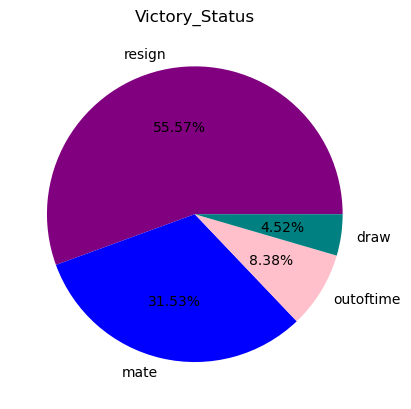

In [12]:
plot_pie('victory_status',  title='Victory_Status')

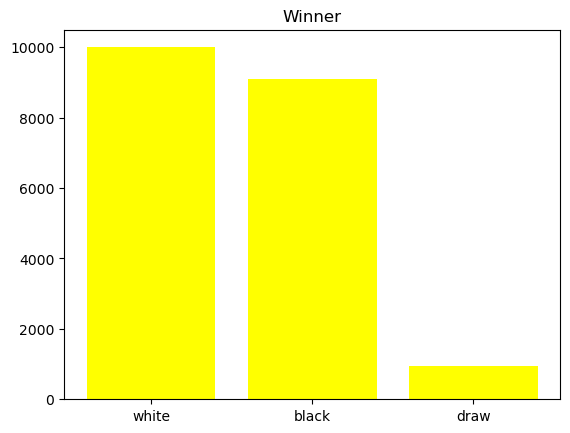

In [30]:
#WINNER
plot_bar('winner', title='Winner')

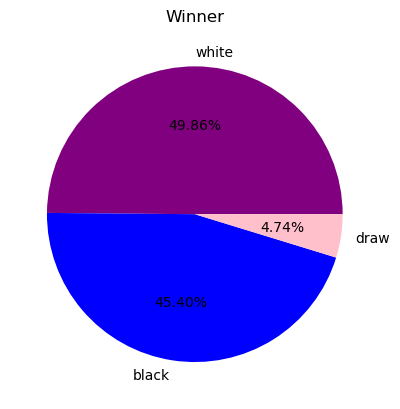

In [14]:
plot_pie('winner', title="Winner")

In [15]:
#white_id
chess_df['white_id'].value_counts().head()

white_id
taranga          72
chess-brahs      53
a_p_t_e_m_u_u    49
ssf7             48
bleda            48
Name: count, dtype: int64

In [16]:
#black_id
chess_df['black_id'].value_counts().head()

black_id
taranga               82
vladimir-kramnik-1    60
a_p_t_e_m_u_u         47
docboss               44
king5891              44
Name: count, dtype: int64

In [17]:
#opening_eco (Standardised Code for any given opening)
chess_df['opening_eco'].value_counts().head(10)

opening_eco
A00    1007
C00     844
D00     739
B01     716
C41     691
C20     675
A40     618
B00     611
B20     567
C50     538
Name: count, dtype: int64

In [18]:
#opening_name
#Van't Kruijs Opening is considered an Irregular Opening that is rarely played in professional chess. However, it is found to be the most popular opening in the available Lichess Dataset. 
#Below are the top 10 popular openings and the configuration does not change much for rated games and games in general.
chess_df['opening_name'].value_counts().head(10)

opening_name
Van't Kruijs Opening                             368
Sicilian Defense                                 358
Sicilian Defense: Bowdler Attack                 296
Scotch Game                                      271
French Defense: Knight Variation                 271
Scandinavian Defense: Mieses-Kotroc Variation    259
Queen's Pawn Game: Mason Attack                  232
Queen's Pawn Game: Chigorin Variation            229
Scandinavian Defense                             223
Horwitz Defense                                  209
Name: count, dtype: int64

In [19]:
#opening_ply (Number of moves in the opening phase)
chess_df['opening_ply'].describe()

count    20058.000000
mean         4.816981
std          2.797152
min          1.000000
25%          3.000000
50%          4.000000
75%          6.000000
max         28.000000
Name: opening_ply, dtype: float64

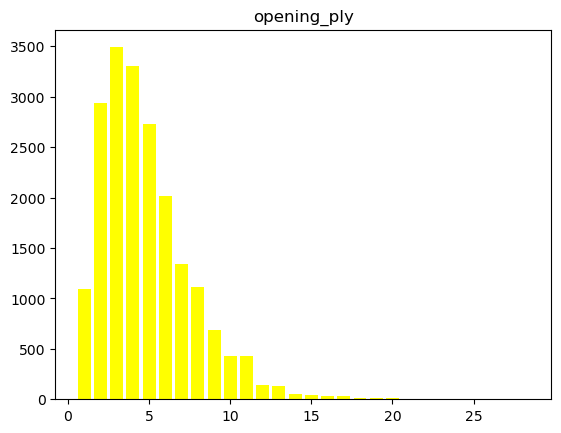

In [31]:
plot_bar('opening_ply', title="opening_ply")

###### Number of Turns

In [ ]:
plot_descriptive_statistics(df=chess_df[['turns']],descp_flag=True)

'Summary statistics:'
count : 
"{'turns': 17114.0}"

mean : 
"{'turns': 58.05212107046862}"

std : 
"{'turns': 31.461237623443203}"

min : 
"{'turns': 1.0}"

25% : 
"{'turns': 36.0}"

50% : 
"{'turns': 53.0}"

75% : 
"{'turns': 75.0}"

max : 
"{'turns': 222.0}"

'=================================================='


'****************************************'
'Uni-Variante Analysis'
'****************************************'
'Distribution of numerical variables:'


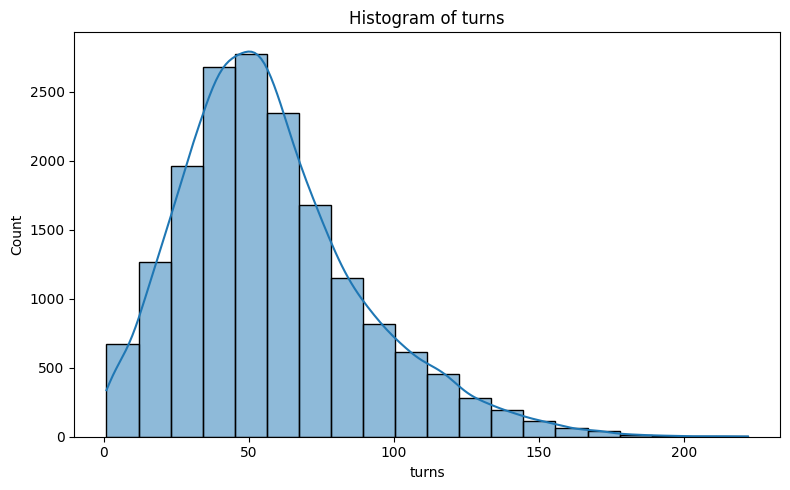

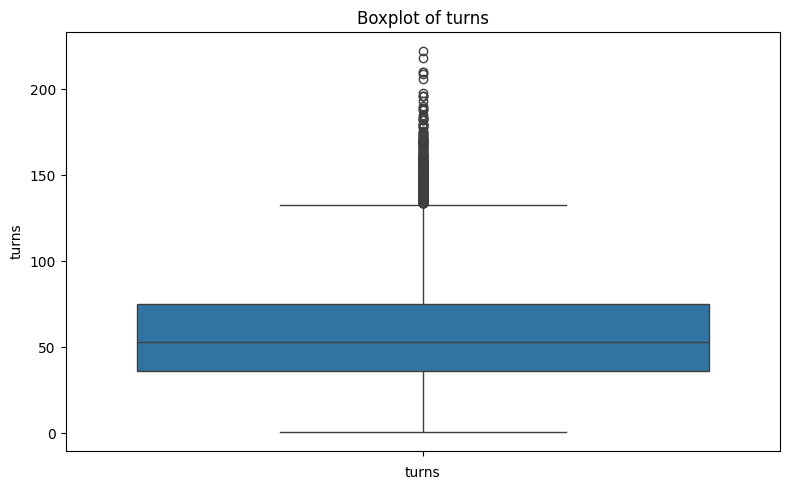

'=================================================='


In [ ]:
plot_descriptive_statistics(df=chess_df[['turns']],uni_variate_flag=True,fgsize=(8,5))

In [ ]:
min_threshold:int=6
below_threshold=chess_df[chess_df['turns']<min_threshold].shape[0]
print(f'Number of turns less than {min_threshold} : #{below_threshold},which makes up {round(below_threshold/chess_df.shape[0],2)*100}% of all games')
del min_threshold,below_threshold

Number of turns less than 6 : #284, which makes up 2.0% of all games


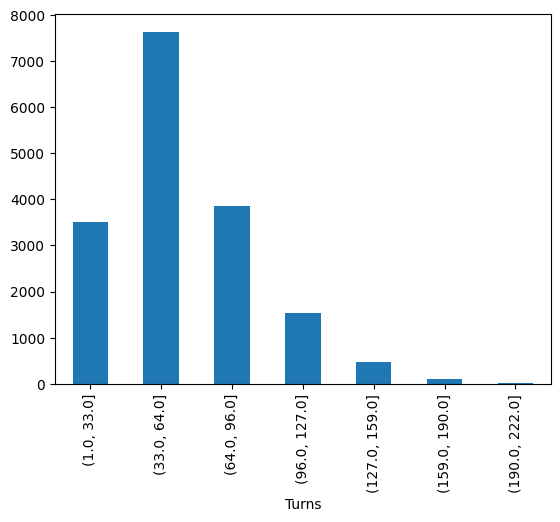

In [ ]:
chess_df['turns_binned']=pd.cut(x=chess_df['turns'],bins=7,precision=0)
chess_df['turns_binned'].value_counts().sort_index().plot.bar(xlabel='Turns')
plt.show()

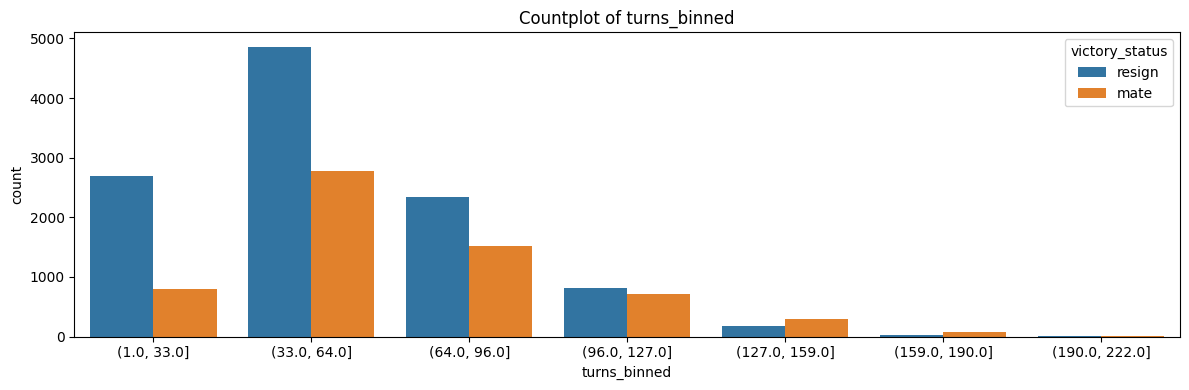

In [ ]:
plot_countplot(dt=chess_df,c_name='turns_binned',y_label='victory_status',fgsize=(12,4))

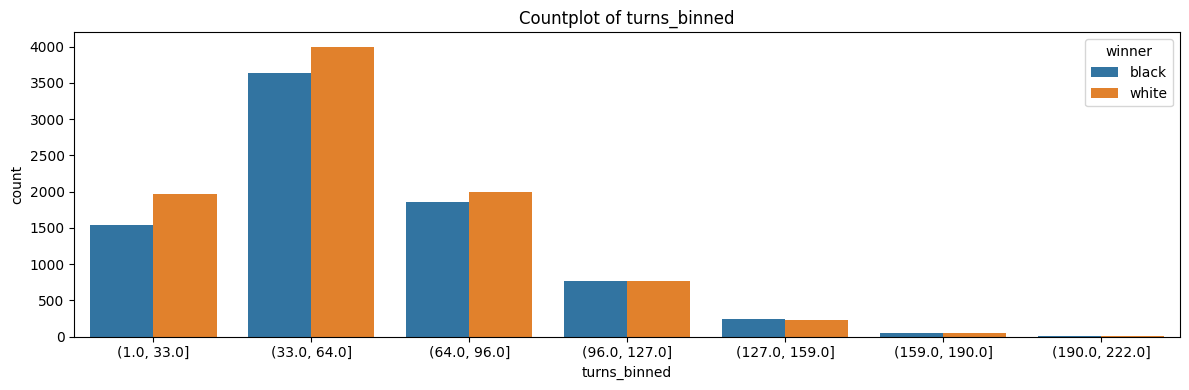

In [ ]:
plot_countplot(dt=chess_df,c_name='turns_binned',y_label='winner',fgsize=(12,4))

For more details,refer to [Chess.com](https://www.chess.com/forum/view/general/standard-blitz-and-bullet "Chess.com Homepage")

 - Bullet=1 or 2 minutes
 - Blitz=3 to 14 minutes
 - Standard=15 minutes and more

In [ ]:
chess_df[['initial_time','step_per_move']]=chess_df['increment_code'].str.split('+',expand=True)
chess_df['initial_time']=chess_df['initial_time'].astype(int)
chess_df['step_per_move']=chess_df['step_per_move'].astype(int)

def categorize_time(init_time):
  if init_time < 3:
    return 'Bullet'
  elif init_time > 14:
    return 'Standard'
  else:
    return 'Blitz'

chess_df['game_type']=chess_df['initial_time'].apply(categorize_time)
del categorize_time

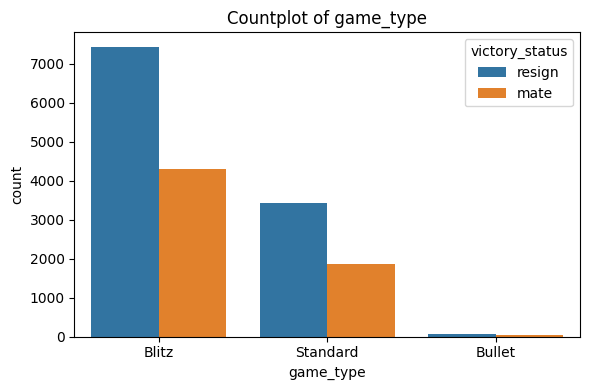

In [ ]:
plot_countplot(dt=chess_df,c_name='game_type',y_label='victory_status')

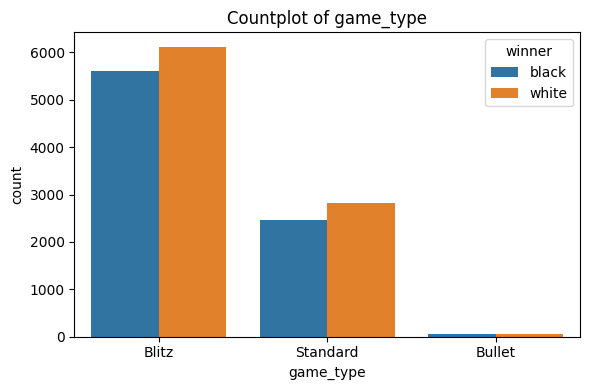

In [ ]:
plot_countplot(dt=chess_df,c_name='game_type',y_label='winner')

For more details,refer to:
- [ECO code CSV sheet](https://lichess.org/forum/general-chess-discussion/eco-code-csv-sheet "Lichess.org Homepage")
- [ECO Codes](https://www.365chess.com/eco.php "365Chess.com Homepage")
- [Chess Opening Reference](https://docs.google.com/spreadsheets/d/1CehtdBIt5cOkRy6mbgMJlLjvfK1StGsqiKVCkeh9uqQ/edit#gid=0 "Shared GoogleSheet")

In [ ]:
eco_codes=pd.read_csv('Chess Opening Reference - Sheet1.csv',usecols=['ECO Code','Name'])
print(eco_codes.shape)

(500, 2)


In [ ]:
eco_codes.head()

,ECO Code,Name
0,A00,Uncommon Opening
1,A01,Nimzovich-Larsen Attack
2,A02,Bird's Opening
3,A03,Bird's Opening
4,A04,Reti Opening


In [ ]:
eco_codes['Name'].nunique()

302

In [ ]:
eco_codes['ECO_Names']=eco_codes['Name'].str.split(',',expand=True)[0]

for word1 in [' Defense',' Attack',' Opening',' Accepted',' Declined',' Game',' (Tartakower Variation)',]:
  eco_codes['ECO_Names']=eco_codes['ECO_Names'].str.replace(word1,'',regex=False).str.strip()
del word1

cleaned_names={
  "Queen's Gambit Semi-Slav" : "Queen's Gambit",
  "Queen's Gambit Slav" : "Queen's Gambit",
  "Queen's Pawn (with ...d6)" : "Queen's Pawn",
  "Uncommon King's Pawn" : 'Uncommon',
  'English with b3' : 'English',
}

eco_codes['ECO_Names']=eco_codes['ECO_Names'].replace(cleaned_names)
del cleaned_names

In [ ]:
eco_codes['ECO_Names'].nunique()

46

In [ ]:
eco_codes['ECO_Names'].drop_duplicates().tolist()

['Uncommon',
 'Nimzovich-Larsen',
 "Bird's",
 'Reti',
 "King's Indian",
 'English',
 "Queen's Pawn",
 'Modern',
 'Old Benoni',
 "Queen's Indian",
 'Budapest Gambit',
 'Old Indian',
 'Benoni',
 'Benko Gambit',
 'Dutch',
 'Scandinavian',
 "Alekhine's",
 'Robatsch',
 'Pirc',
 'Caro-Kann',
 'Sicilian',
 'French',
 "King's Pawn",
 'Center',
 "Bishop's",
 'Vienna',
 'Vienna Gambit',
 "King's Gambit",
 "King's Knight",
 'Philidor',
 'Petrov',
 'Scotch',
 'Three Knights',
 'Four Knights',
 'Giuoco Piano',
 'Evans Gambit',
 'Two Knights',
 'Ruy Lopez',
 'Richter-Veresov',
 'Torre',
 "Queen's Gambit",
 'Neo-Grunfeld',
 'Grunfeld',
 'Catalan',
 'Bogo-Indian',
 'Nimzo-Indian']

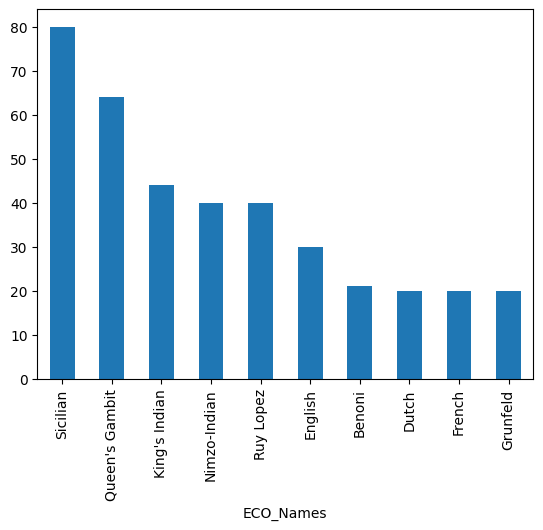

In [ ]:
eco_codes['ECO_Names'].value_counts().head(10).plot.bar(xlabel='ECO_Names')
plt.show()

In [ ]:
eco_codes=eco_codes[['ECO Code','ECO_Names']]
eco_codes.columns=['opening_eco','ECO_Names']
chess_df=pd.merge(left=chess_df,right=eco_codes,on=['opening_eco'],how='left')
del eco_codes

In [ ]:
chess_df['ECO_Names'].nunique()

46

In [ ]:
chess_df['ECO_Names'].isnull().sum()

0

In [ ]:
chess_df['ECO_Names'].value_counts()

ECO_Names
Sicilian            2230
Queen's Pawn        2014
Uncommon            1407
French              1272
Queen's Gambit      1085
King's Pawn          919
Ruy Lopez            737
Scandinavian         619
Philidor             586
English              575
Giuoco Piano         556
Caro-Kann            470
Two Knights          407
King's Knight        384
Reti                 361
Pirc                 310
Petrov               300
King's Indian        283
Scotch               247
Bishop's             231
Three Knights        228
Center               217
King's Gambit        209
Alekhine's           161
Robatsch             149
Nimzovich-Larsen     133
Bird's               130
Vienna               128
Nimzo-Indian         125
Four Knights         121
Dutch                110
Richter-Veresov       78
Old Benoni            69
Grunfeld              55
Queen's Indian        39
Budapest Gambit       33
Evans Gambit          27
Benoni                21
Benko Gambit          19
Old Indian     

In [ ]:
top_opening_names:list=["Sicilian","Queen's Pawn","Uncommon","French","Queen's Gambit","King's Pawn","Ruy Lopez","Scandinavian","Philidor","English"]

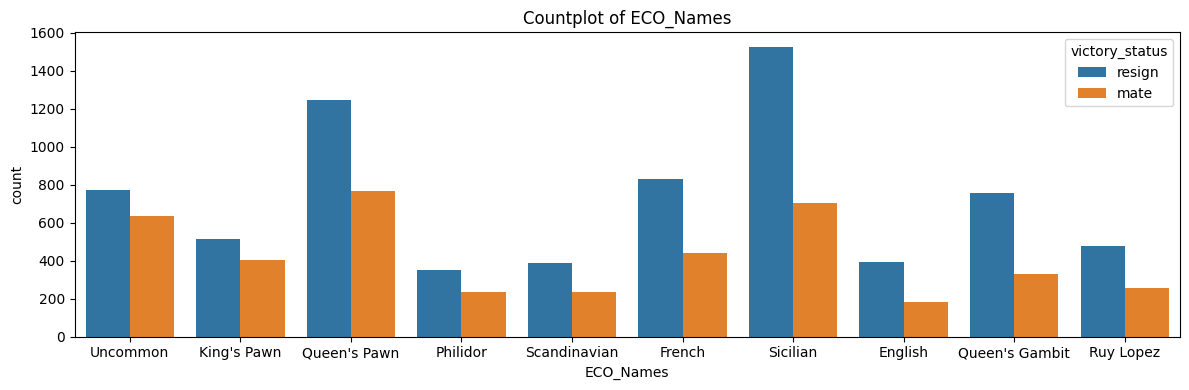

In [ ]:
plot_countplot(dt=chess_df[chess_df['ECO_Names'].isin(top_opening_names)],c_name='ECO_Names',y_label='victory_status',fgsize=(12,4))

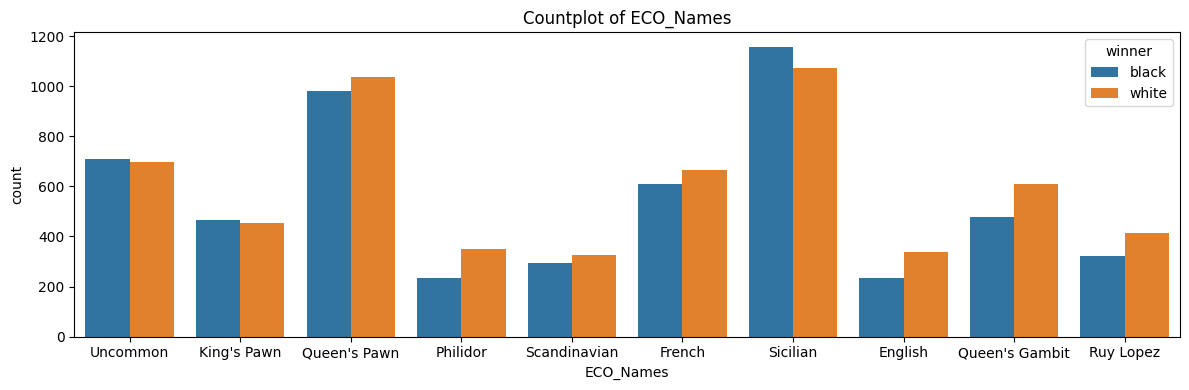

In [ ]:
plot_countplot(dt=chess_df[chess_df['ECO_Names'].isin(top_opening_names)],c_name='ECO_Names',y_label='winner',fgsize=(12,4))

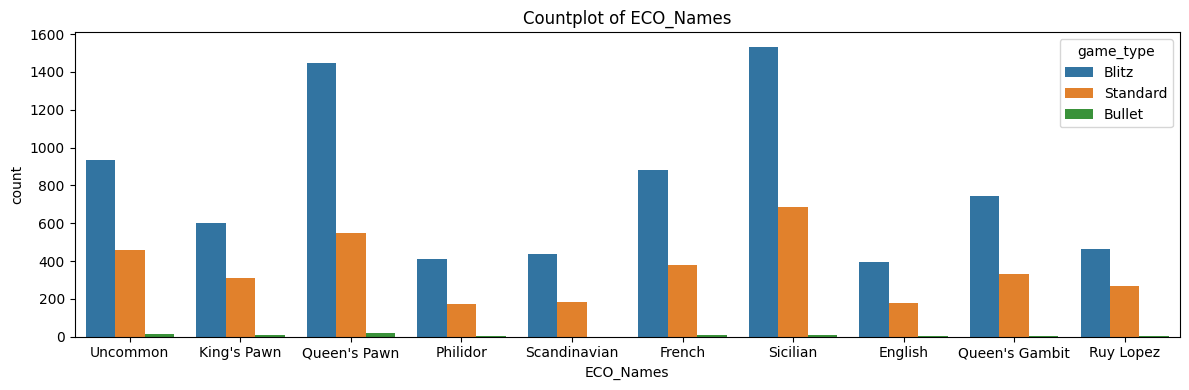

In [ ]:
plot_countplot(dt=chess_df[chess_df['ECO_Names'].isin(top_opening_names)],c_name='ECO_Names',y_label='game_type',fgsize=(12,4))

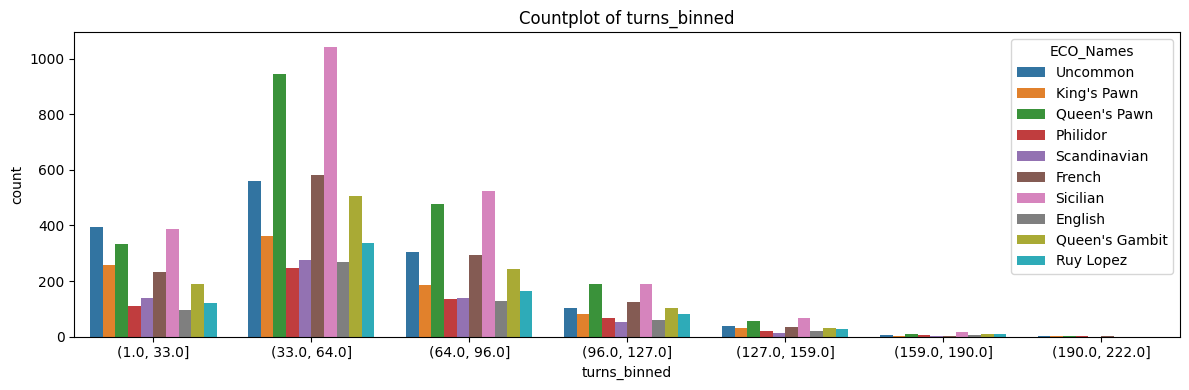

In [ ]:
plot_countplot(dt=chess_df[chess_df['ECO_Names'].isin(top_opening_names)],c_name='turns_binned',y_label='ECO_Names',fgsize=(12,4))

##### What is the general trend of white player vs black player

In [ ]:
winner_distribution_df=chess_df['winner'].value_counts()

white_players_df=chess_df[chess_df['winner']=='white']
average_white_rating=white_players_df['white_rating'].mean().round(4)
average_white_turns=white_players_df['turns'].mean().round(4)
white_players_df['z_score_white_rating']=((white_players_df['white_rating']-average_white_rating)/white_players_df['white_rating'].std().round(4))
average_white_duration=(white_players_df['last_move_at']-white_players_df['created_at']).mean().round(4)

black_players_df=chess_df[chess_df['winner']=='black']
average_black_rating=black_players_df['black_rating'].mean().round(4)
average_black_turns=black_players_df['turns'].mean().round(4)
black_players_df['z_score_black_rating']=((black_players_df['black_rating']-average_black_rating)/black_players_df['black_rating'].std().round(4))
average_black_duration=(black_players_df['last_move_at']-black_players_df['created_at']).mean().round(4)

print("General Trends of 'White' vs. 'Black' Players")
print("\nMean Rating (White):",average_white_rating," vs Mean Rating (Black):",average_black_rating)
print("\nMean Turns (White):",average_white_turns," vs Mean Turns (Black):",average_black_turns)
print("\nMean Match Duration (White):",average_white_duration," vs Mean Match Duration (Black):",average_black_duration)
print("\nDistribution of Winners:",winner_distribution_df)
del average_black_duration,average_black_rating,average_black_turns,average_white_duration,average_white_rating,average_white_turns,winner_distribution_df

General Trends of 'White' vs. 'Black' Players

Mean Rating (White): 1633.2641  vs Mean Rating (Black): 1637.6974

Mean Turns (White): 56.5753  vs Mean Turns (Black): 59.6902

Mean Match Duration (White): 815772.4703  vs Mean Match Duration (Black): 780319.753

Distribution of Winners: winner
white    9000
black    8114
Name: count, dtype: int64


In [ ]:
plot_descriptive_statistics(df=white_players_df[['z_score_white_rating']],descp_flag=True)

'Summary statistics:'
count : 
"{'z_score_white_rating': 9000.0}"

mean : 
"{'z_score_white_rating': 3.8495276274690896e-08}"

std : 
"{'z_score_white_rating': 1.000000133347762}"

min : 
"{'z_score_white_rating': -2.942339080023712}"

25% : 
"{'z_score_white_rating': -0.6799716736356595}"

50% : 
"{'z_score_white_rating': -0.10831681597252212}"

75% : 
"{'z_score_white_rating': 0.6469605111218047}"

max : 
"{'z_score_white_rating': 3.695786418658537}"

'=================================================='


In [ ]:
def categorize_rating(score):
  if score < -0.68:
    return 'Low Rating'
  elif score > 0.646:
    return 'High Rating'
  else:
    return 'Mid Rating'

white_players_df['rating_level']=white_players_df['z_score_white_rating'].apply(categorize_rating)
del categorize_rating

In [ ]:
plot_descriptive_statistics(df=black_players_df[['z_score_black_rating']],descp_flag=True)

'Summary statistics:'
count : 
"{'z_score_black_rating': 8114.0}"

mean : 
"{'z_score_black_rating': 1.2690007381853336e-07}"

std : 
"{'z_score_black_rating': 0.9999999832745025}"

min : 
"{'z_score_black_rating': -2.948299173209199}"

25% : 
"{'z_score_black_rating': -0.6902570694087404}"

50% : 
"{'z_score_black_rating': -0.10316612242062119}"

75% : 
"{'z_score_black_rating': 0.6541464600847633}"

max : 
"{'z_score_black_rating': 3.4159056485791703}"

'=================================================='


In [ ]:
def categorize_rating(score):
  if score < -0.689:
    return 'Low Rating'
  elif score > 0.654:
    return 'High Rating'
  else:
    return 'Mid Rating'

black_players_df['rating_level']=black_players_df['z_score_black_rating'].apply(categorize_rating)
del categorize_rating

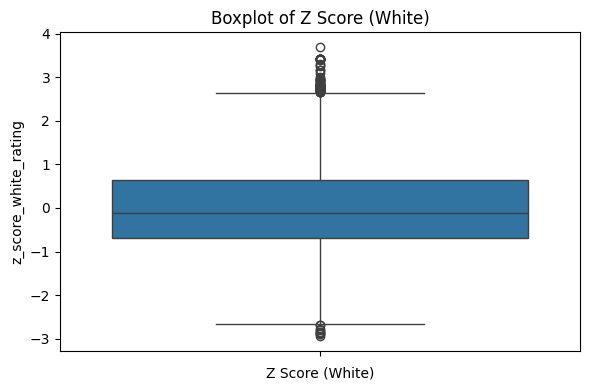

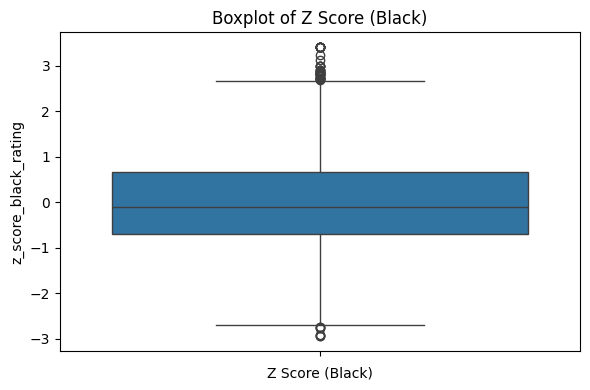

In [ ]:
plot_boxplot(df=white_players_df['z_score_white_rating'],c_name='Z Score (White)'),
plot_boxplot(df=black_players_df['z_score_black_rating'],c_name='Z Score (Black)')

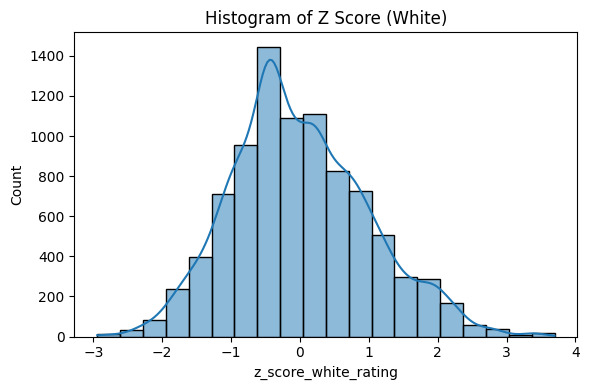

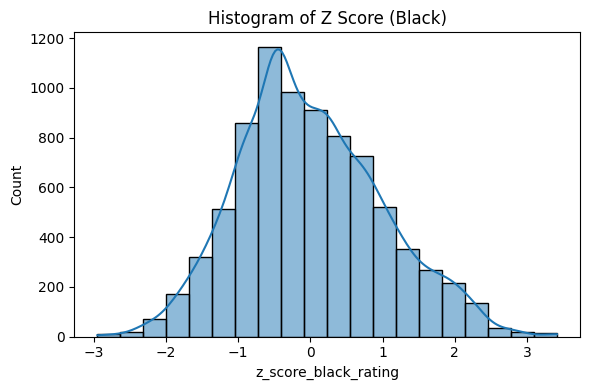

In [ ]:
plot_histogram(df=white_players_df['z_score_white_rating'],c_name='Z Score (White)'),
plot_histogram(df=black_players_df['z_score_black_rating'],c_name='Z Score (Black)')

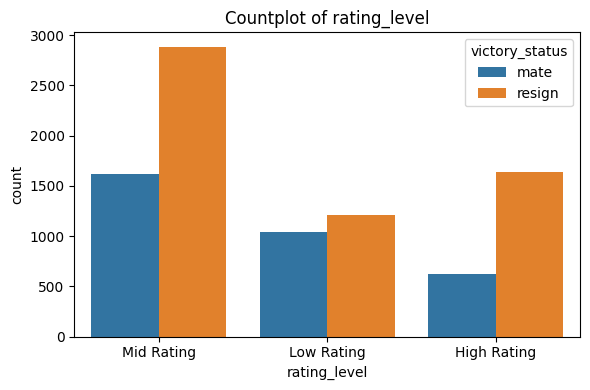

In [ ]:
plot_countplot(dt=white_players_df,c_name='rating_level',y_label='victory_status')

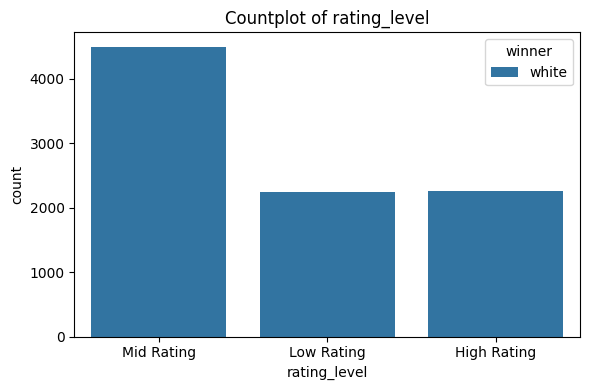

In [ ]:
plot_countplot(dt=white_players_df,c_name='rating_level',y_label='winner')

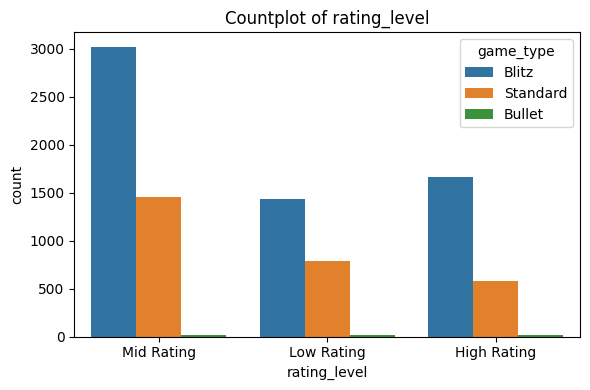

In [ ]:
plot_countplot(dt=white_players_df,c_name='rating_level',y_label='game_type')

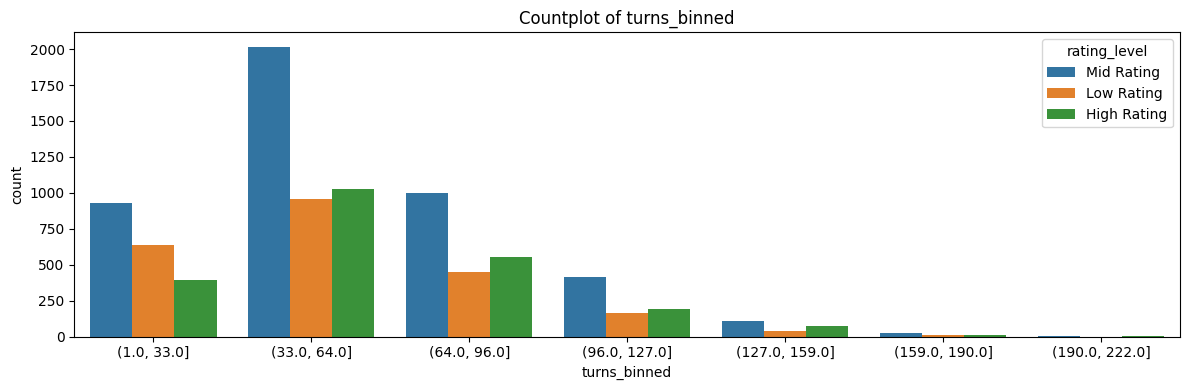

In [ ]:
plot_countplot(dt=white_players_df,c_name='turns_binned',y_label='rating_level',fgsize=(12,4))

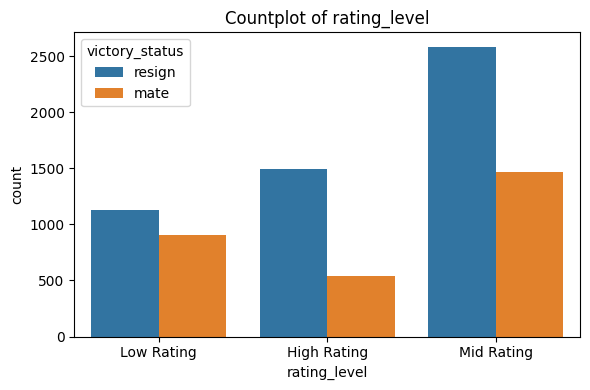

In [ ]:
plot_countplot(dt=black_players_df,c_name='rating_level',y_label='victory_status')

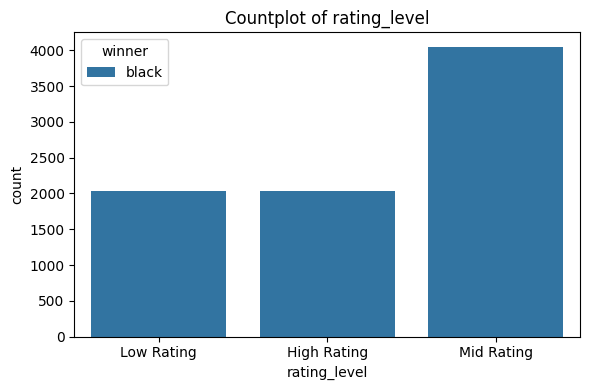

In [ ]:
plot_countplot(dt=black_players_df,c_name='rating_level',y_label='winner')

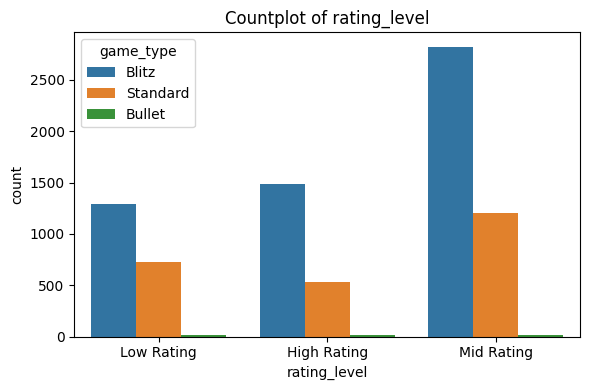

In [ ]:
plot_countplot(dt=black_players_df,c_name='rating_level',y_label='game_type')

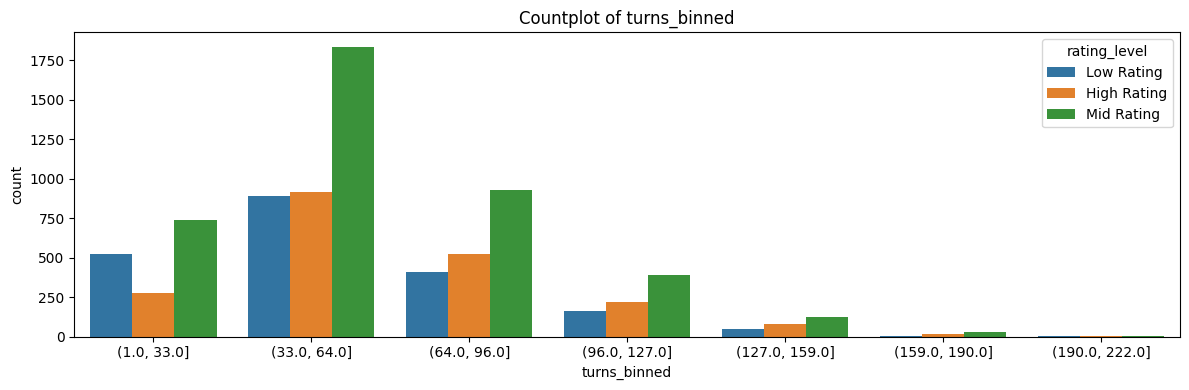

In [ ]:
plot_countplot(dt=black_players_df,c_name='turns_binned',y_label='rating_level',fgsize=(12,4))

In [ ]:
top_openings_white_df=white_players_df['ECO_Names'].value_counts().head(5)
top_openings_black_df=black_players_df['ECO_Names'].value_counts().head(5)
overall_openings_correlation=chess_df.groupby('ECO_Names')[['white_rating','black_rating']].mean()
print("\nOpenings with Respect to Player and Ranking:")
print("\nTop Openings for White Players:")
print(top_openings_white_df)
print("\nTop Openings for Black Players:")
print(top_openings_black_df)
print("\nCorrelation between Opening Names and Player's Ranking:")
print(overall_openings_correlation)
del top_openings_white_df,top_openings_black_df,overall_openings_correlation,black_players_df,white_players_df


Openings with Respect to Player and Ranking:

Top Openings for White Players:
ECO_Names
Sicilian          1073
Queen's Pawn      1035
Uncommon           696
French             664
Queen's Gambit     608
Name: count, dtype: int64

Top Openings for Black Players:
ECO_Names
Sicilian          1157
Queen's Pawn       979
Uncommon           711
French             608
Queen's Gambit     477
Name: count, dtype: int64

Correlation between Opening Names and Player's Ranking:
                  white_rating  black_rating
ECO_Names                                   
Alekhine's         1517.105590   1469.043478
Benko Gambit       1945.210526   1942.000000
Benoni             1878.571429   1855.476190
Bird's             1578.053846   1595.207692
Bishop's           1522.623377   1489.233766
Bogo-Indian        1997.666667   1751.833333
Budapest Gambit    1737.212121   1771.515152
Caro-Kann          1668.110638   1670.489362
Catalan            1940.500000   1667.333333
Center             1493.161290   1

In [ ]:
chess_df['rating_diff']=chess_df['white_rating'] - chess_df['black_rating']
chess_df['rating_diff']=chess_df['rating_diff'].abs()

In [ ]:
plot_descriptive_statistics(df=chess_df[['rating_diff']],descp_flag=True)

'Summary statistics:'
count : 
"{'rating_diff': 17114.0}"

mean : 
"{'rating_diff': 175.26136496435666}"

std : 
"{'rating_diff': 180.24064111954698}"

min : 
"{'rating_diff': 0.0}"

25% : 
"{'rating_diff': 46.0}"

50% : 
"{'rating_diff': 117.0}"

75% : 
"{'rating_diff': 247.0}"

max : 
"{'rating_diff': 1605.0}"

'=================================================='


In [ ]:
def categorize_rating(score):
  if score < 47:
    return 'Low Rating'
  elif score > 246:
    return 'High Rating'
  else:
    return 'Mid Rating'

chess_df['rating_level']=chess_df['rating_diff'].apply(categorize_rating)
del categorize_rating

'****************************************'
'Uni-Variante Analysis'
'****************************************'
'Distribution of numerical variables:'


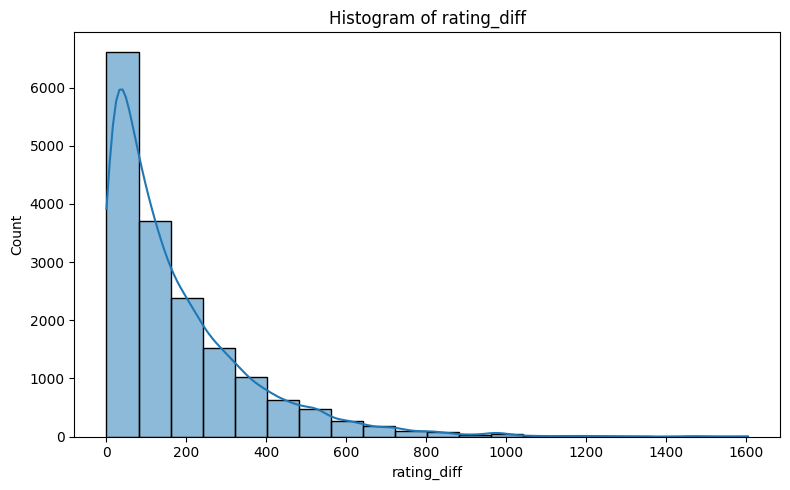

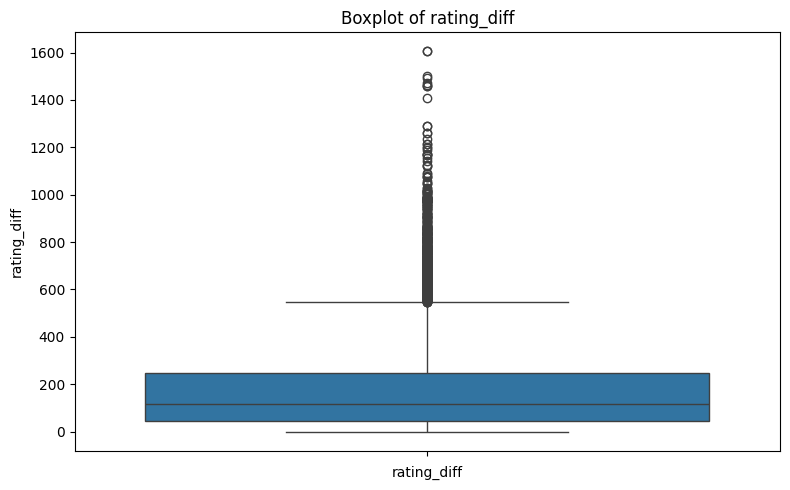

'=================================================='


In [ ]:
plot_descriptive_statistics(df=chess_df[['rating_diff']],uni_variate_flag=True,fgsize=(8,5))

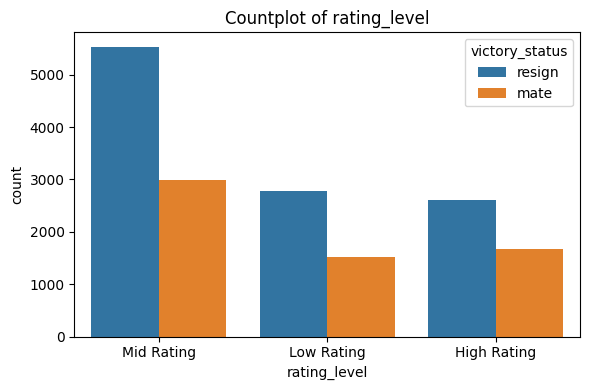

In [ ]:
plot_countplot(dt=chess_df,c_name='rating_level',y_label='victory_status')

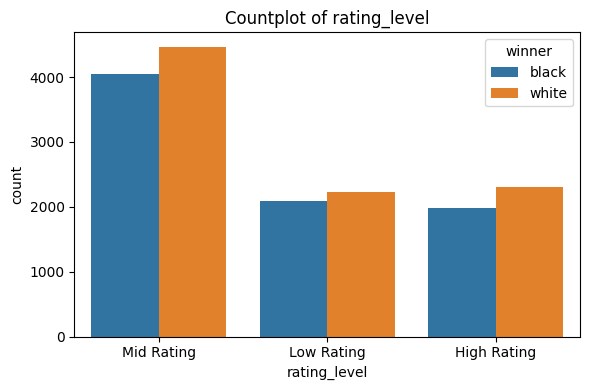

In [ ]:
plot_countplot(dt=chess_df,c_name='rating_level',y_label='winner')

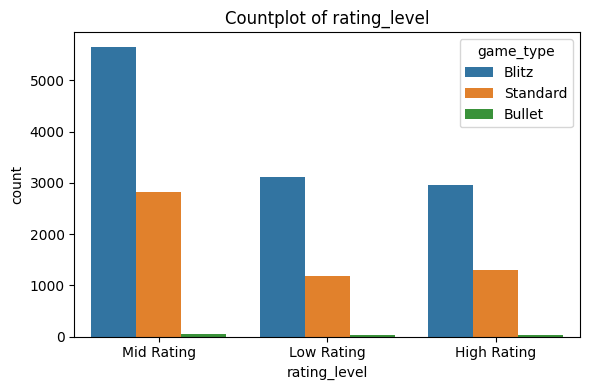

In [ ]:
plot_countplot(dt=chess_df,c_name='rating_level',y_label='game_type')

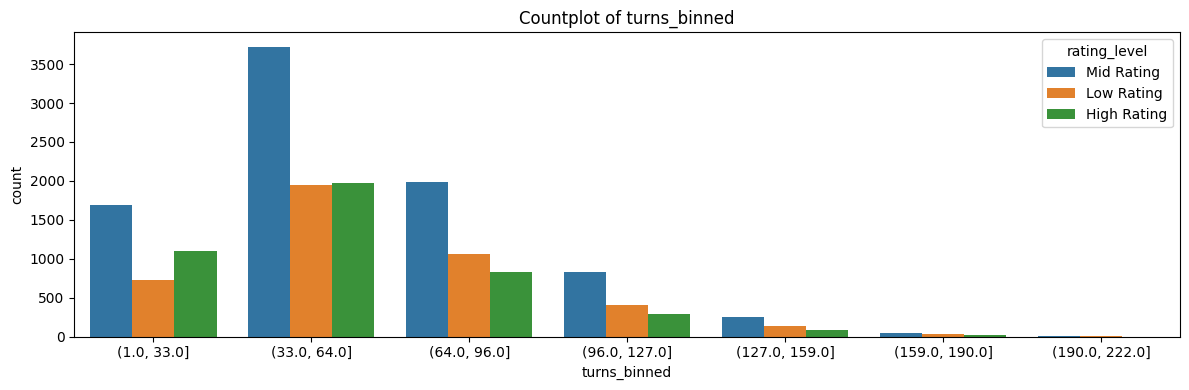

In [ ]:
plot_countplot(dt=chess_df,c_name='turns_binned',y_label='rating_level',fgsize=(12,4))

In [ ]:
chess_df=chess_df.drop(columns=['id','created_at','last_move_at','increment_code','white_id','black_id','opening_eco','opening_name','opening_ply','game_time_duration','step_per_move'])

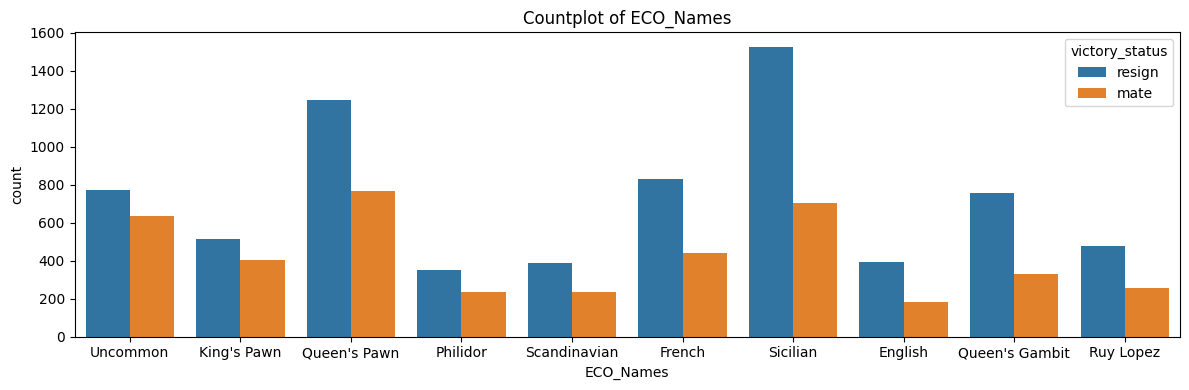

In [ ]:
plot_countplot(dt=chess_df[chess_df['ECO_Names'].isin(top_opening_names)],c_name='ECO_Names',y_label='victory_status',fgsize=(12,4))

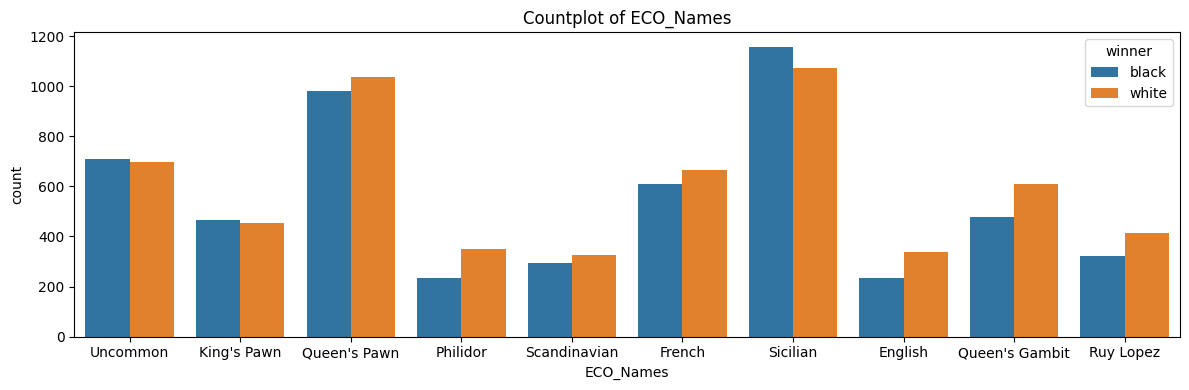

In [ ]:
plot_countplot(dt=chess_df[chess_df['ECO_Names'].isin(top_opening_names)],c_name='ECO_Names',y_label='winner',fgsize=(12,4))

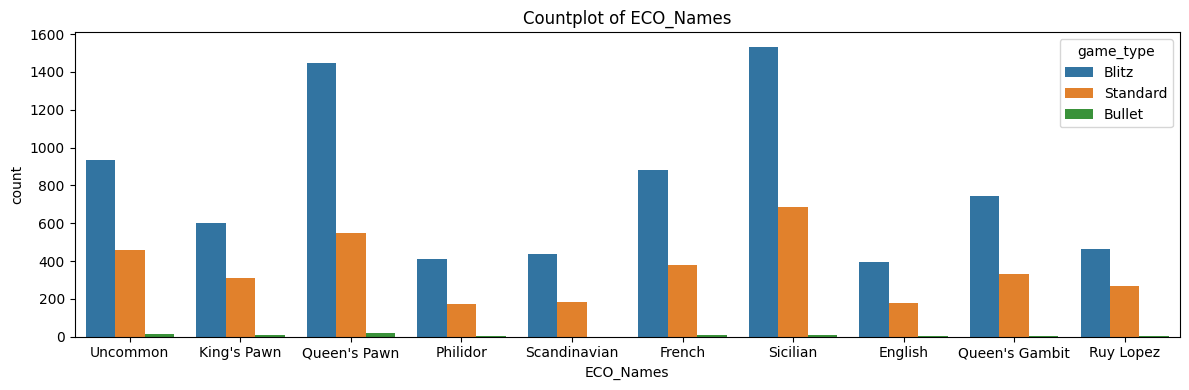

In [ ]:
plot_countplot(dt=chess_df[chess_df['ECO_Names'].isin(top_opening_names)],c_name='ECO_Names',y_label='game_type',fgsize=(12,4))

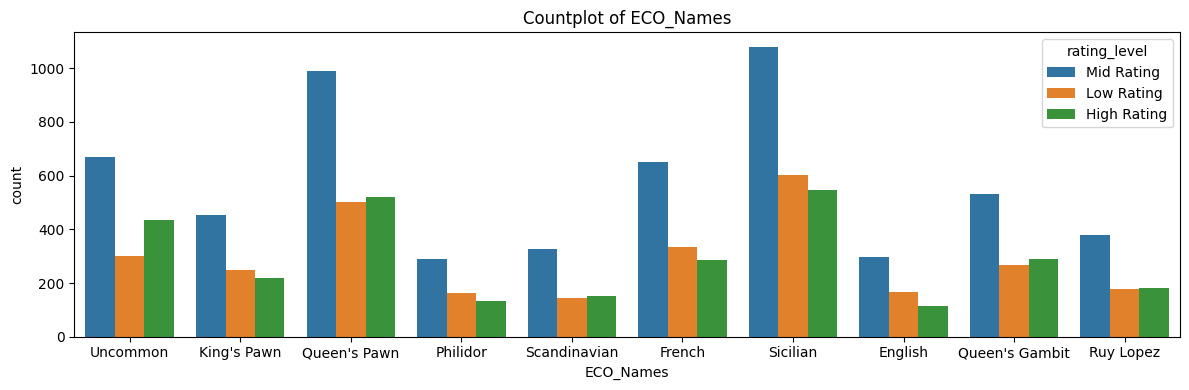

In [ ]:
plot_countplot(dt=chess_df[chess_df['ECO_Names'].isin(top_opening_names)],c_name='ECO_Names',y_label='rating_level',fgsize=(12,4))

In [ ]:
# randomly assign record as train (85%) and test (15%)
chess_df['train_test']=np.random.choice([1,0],size=len(chess_df),p=[0.85,0.15])
print(chess_df.shape)

(17114, 14)


### Objective: Given Features Predict the Outcome of the Game (Who will Win Player1 or Player2)

'****************************************'
'Uni-Variante Analysis'
'****************************************'
'Distribution of numerical variables:'


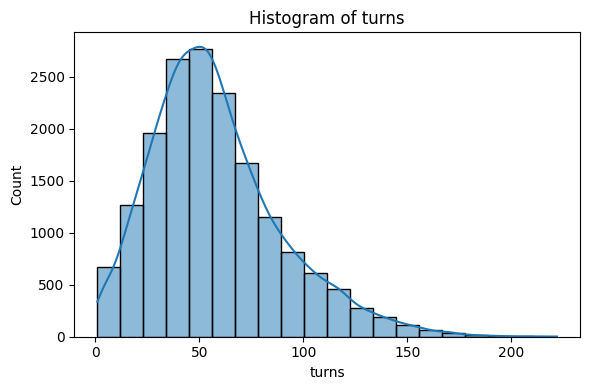

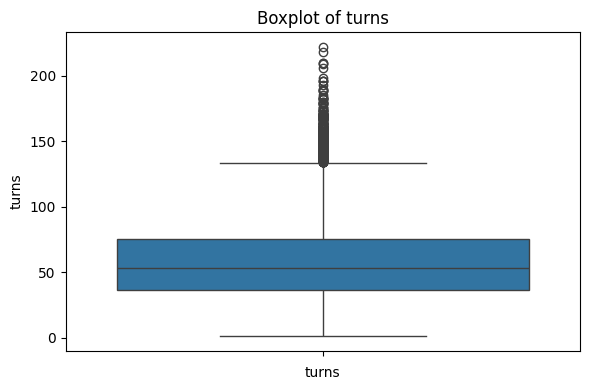

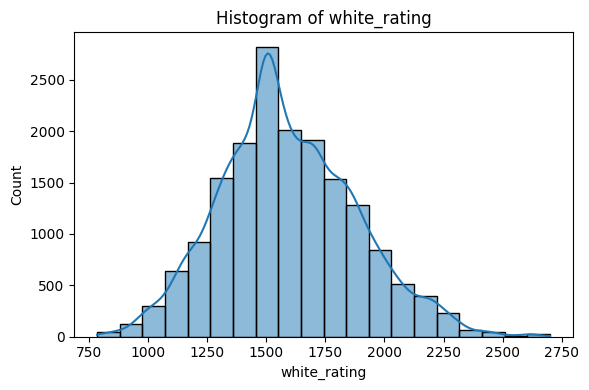

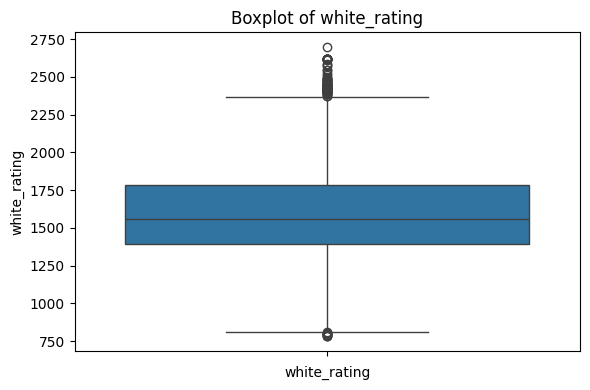

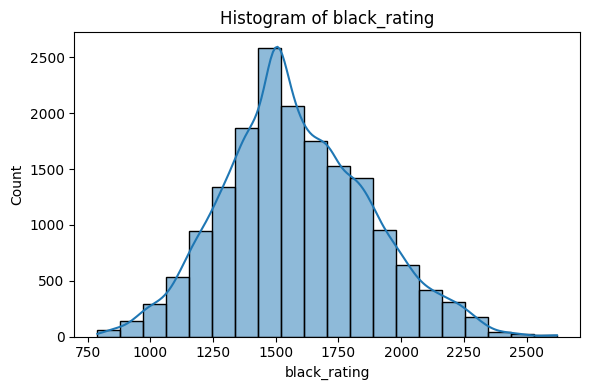

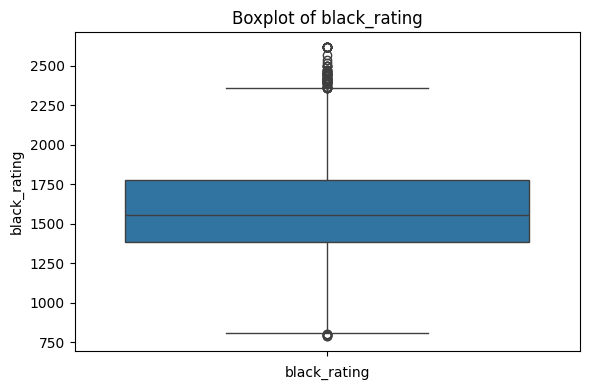

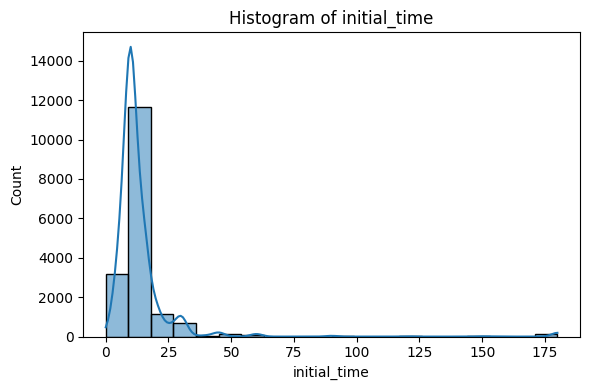

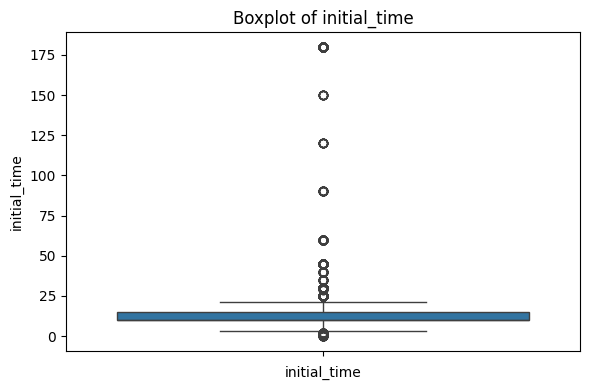

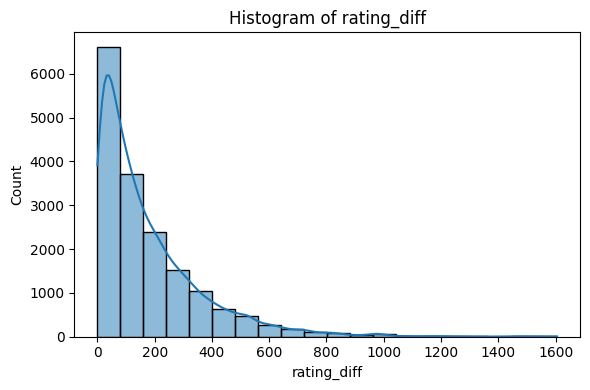

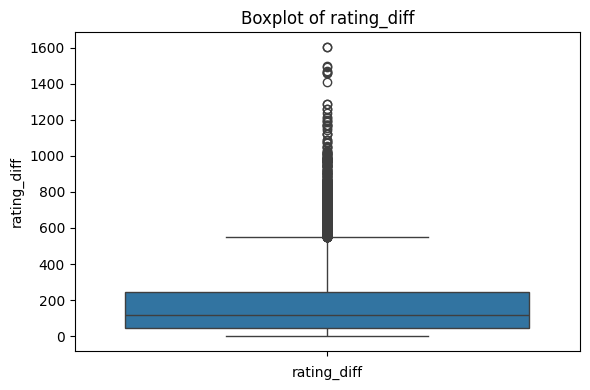

'=================================================='


In [ ]:
plot_descriptive_statistics(df=chess_df[['turns','white_rating','black_rating','initial_time','rating_diff']],uni_variate_flag=True)

In [ ]:
plot_descriptive_statistics(df=chess_df[['turns','white_rating','black_rating','initial_time','rating_diff']],descp_flag=True)

'Summary statistics:'
count : 
("{'turns': 17114.0, 'white_rating': 17114.0, 'black_rating': 17114.0, "
 "'initial_time': 17114.0, 'rating_diff': 17114.0}")

mean : 
("{'turns': 58.05212107046862, 'white_rating': 1591.7524833469674, "
 "'black_rating': 1583.864964356667, 'initial_time': 13.831190837910482, "
 "'rating_diff': 175.26136496435666}")

std : 
("{'turns': 31.461237623443203, 'white_rating': 288.13512297613266, "
 "'black_rating': 289.04224508411744, 'initial_time': 16.79968380453556, "
 "'rating_diff': 180.24064111954698}")

min : 
("{'turns': 1.0, 'white_rating': 784.0, 'black_rating': 789.0, 'initial_time': "
 "0.0, 'rating_diff': 0.0}")

25% : 
("{'turns': 36.0, 'white_rating': 1396.0, 'black_rating': 1388.0, "
 "'initial_time': 10.0, 'rating_diff': 46.0}")

50% : 
("{'turns': 53.0, 'white_rating': 1562.0, 'black_rating': 1556.0, "
 "'initial_time': 10.0, 'rating_diff': 117.0}")

75% : 
("{'turns': 75.0, 'white_rating': 1785.0, 'black_rating': 1776.0, "
 "'initial_time': 

###### Since there seems to be a lot of extreme points we will filter out some data based on a fixed window

In [ ]:
print(chess_df.shape)
chess_df=chess_df[
      (chess_df['turns']>12) &
      (chess_df['turns']<70) &
      (chess_df['white_rating']>1099) &
      (chess_df['white_rating']<2101) &
      (chess_df['black_rating']>1099) &
      (chess_df['black_rating']<2101) &
      (chess_df['initial_time']>3) &
      (chess_df['initial_time']<20) &
      (chess_df['rating_diff']>20) &
      (chess_df['rating_diff']<270)
    ]
print(chess_df.shape)

(17114, 14)
(5684, 14)


In [ ]:
(5684/17114)

0.3321257450040902

'****************************************'
'Uni-Variante Analysis'
'****************************************'
'Distribution of numerical variables:'


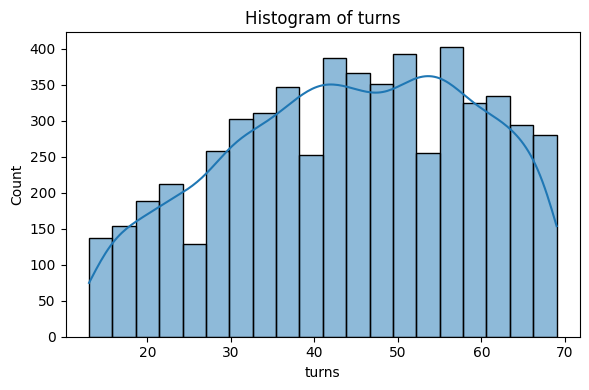

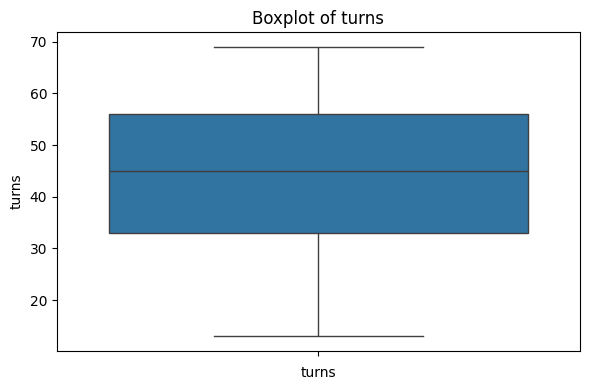

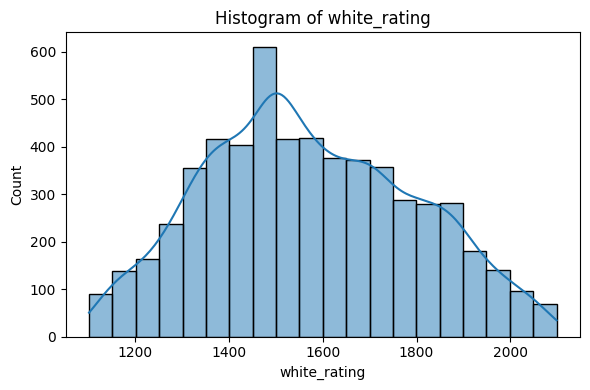

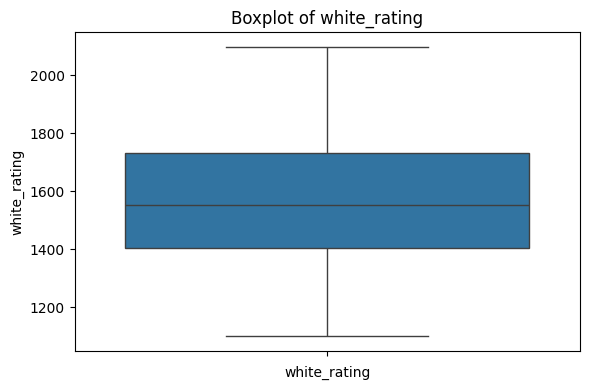

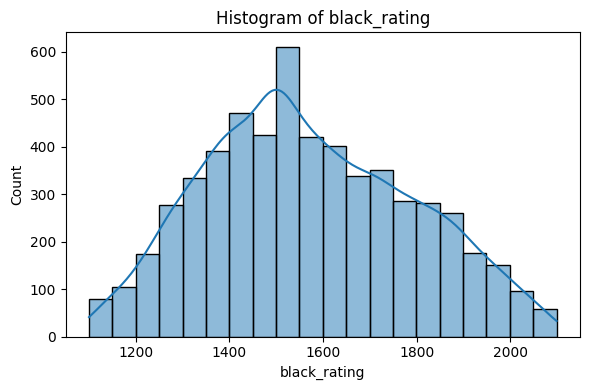

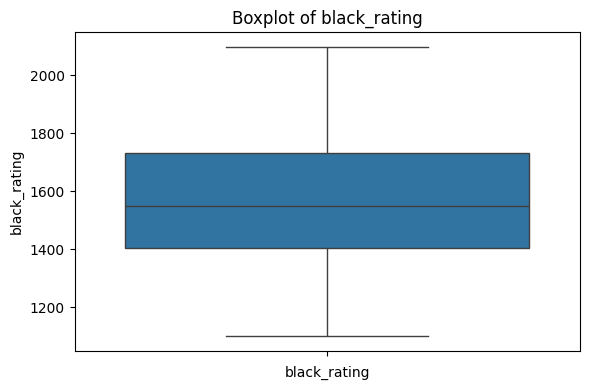

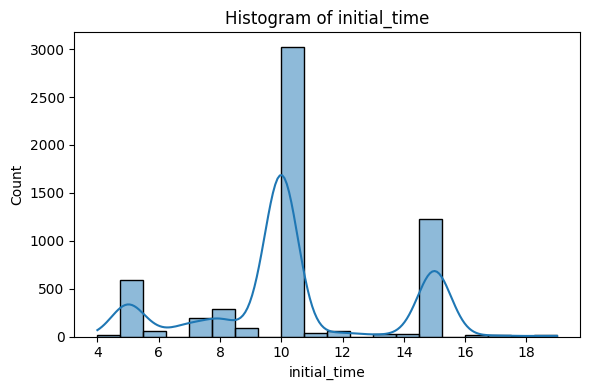

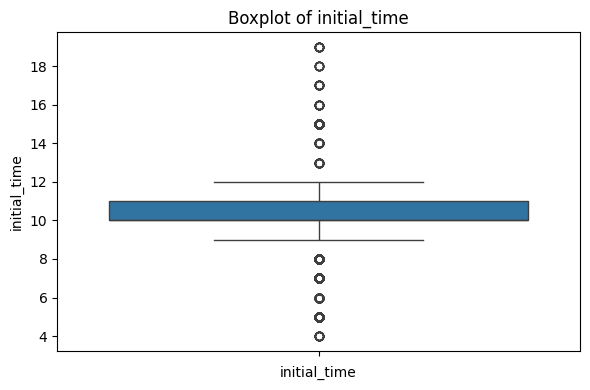

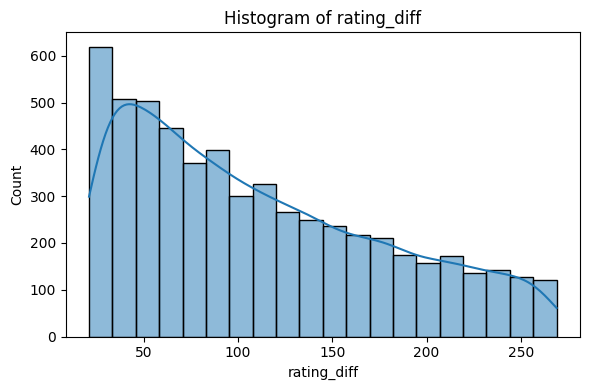

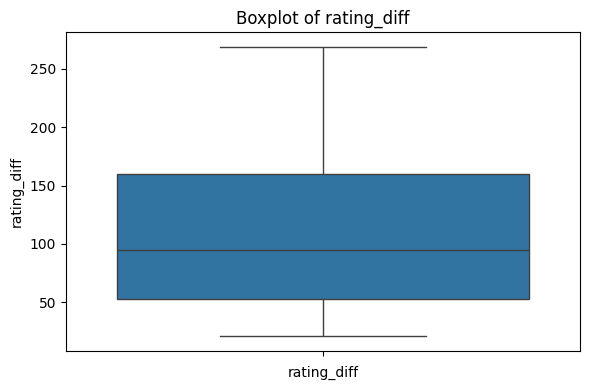

'=================================================='


In [ ]:
plot_descriptive_statistics(df=chess_df[['turns','white_rating','black_rating','initial_time','rating_diff']],uni_variate_flag=True)

In [ ]:
plot_descriptive_statistics(df=chess_df[['turns','white_rating','black_rating','initial_time','rating_diff']],descp_flag=True)

'Summary statistics:'
count : 
("{'turns': 5684.0, 'white_rating': 5684.0, 'black_rating': 5684.0, "
 "'initial_time': 5684.0, 'rating_diff': 5684.0}")

mean : 
("{'turns': 44.09113300492611, 'white_rating': 1571.9167839549614, "
 "'black_rating': 1570.1662561576354, 'initial_time': 10.40341308937368, "
 "'rating_diff': 110.60204081632654}")

std : 
("{'turns': 14.736078038984623, 'white_rating': 222.5490930735834, "
 "'black_rating': 220.55315255083303, 'initial_time': 3.045261642897883, "
 "'rating_diff': 67.65178750549101}")

min : 
("{'turns': 13.0, 'white_rating': 1101.0, 'black_rating': 1100.0, "
 "'initial_time': 4.0, 'rating_diff': 21.0}")

25% : 
("{'turns': 33.0, 'white_rating': 1403.75, 'black_rating': 1403.0, "
 "'initial_time': 10.0, 'rating_diff': 53.0}")

50% : 
("{'turns': 45.0, 'white_rating': 1552.0, 'black_rating': 1548.0, "
 "'initial_time': 10.0, 'rating_diff': 95.0}")

75% : 
("{'turns': 56.0, 'white_rating': 1734.25, 'black_rating': 1732.25, "
 "'initial_time': 1

In [ ]:
chess_df=pd.read_csv('Cleaned_chess_df.csv')
print(chess_df.shape)

(17114, 14)


In [ ]:
chess_df.head(1).to_dict(orient='records')

[{'rated': True,
  'turns': 16,
  'victory_status': 'resign',
  'winner': 'black',
  'white_rating': 1322,
  'black_rating': 1261,
  'moves': 'd4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6 Qe5+ Nxe5 c4 Bb4+',
  'turns_binned': '(1.0, 33.0]',
  'initial_time': 5,
  'game_type': 'Blitz',
  'ECO_Names': 'Uncommon',
  'rating_diff': 61,
  'rating_level': 'Mid Rating',
  'train_test': 1}]

In [ ]:
min_max_scaling:list=['initial_time','rating_diff']
standar_scaling:list=['turns','white_rating','black_rating']
dummies_columns:list=['rated','victory_status','winner','turns_binned','game_type','ECO_Names','rating_level']

min_max_scaler=MinMaxScaler().set_output(transform="pandas")
standar_scaler=StandardScaler().set_output(transform="pandas")
one_hot_encoder=OneHotEncoder(drop='first',sparse=False).set_output(transform="pandas")

min_max_scaler.fit(chess_df[min_max_scaling])
standar_scaler.fit(chess_df[standar_scaling])
one_hot_encoder.fit(chess_df[dummies_columns])

In [ ]:
chess_df=pd.concat(objs=[
    chess_df.drop(columns=min_max_scaling+standar_scaling+dummies_columns+['moves']),
    min_max_scaler.transform(chess_df[min_max_scaling]),
    standar_scaler.transform(chess_df[standar_scaling]),
    one_hot_encoder.transform(chess_df[dummies_columns]),
    ],ignore_index=False,axis=1)
print(chess_df.shape)

(17114, 64)


In [ ]:
chess_df['train_test'].value_counts()

train_test
1    14579
0     2535
Name: count, dtype: int64

In [ ]:
chess_df.columns

Index(['train_test', 'initial_time', 'rating_diff', 'turns', 'white_rating',
       'black_rating', 'rated_True', 'victory_status_resign', 'winner_white',
       'turns_binned_(127.0, 159.0]', 'turns_binned_(159.0, 190.0]',
       'turns_binned_(190.0, 222.0]', 'turns_binned_(33.0, 64.0]',
       'turns_binned_(64.0, 96.0]', 'turns_binned_(96.0, 127.0]',
       'game_type_Bullet', 'game_type_Standard', 'ECO_Names_Benko Gambit',
       'ECO_Names_Benoni', 'ECO_Names_Bird's', 'ECO_Names_Bishop's',
       'ECO_Names_Bogo-Indian', 'ECO_Names_Budapest Gambit',
       'ECO_Names_Caro-Kann', 'ECO_Names_Catalan', 'ECO_Names_Center',
       'ECO_Names_Dutch', 'ECO_Names_English', 'ECO_Names_Evans Gambit',
       'ECO_Names_Four Knights', 'ECO_Names_French', 'ECO_Names_Giuoco Piano',
       'ECO_Names_Grunfeld', 'ECO_Names_King's Gambit',
       'ECO_Names_King's Indian', 'ECO_Names_King's Knight',
       'ECO_Names_King's Pawn', 'ECO_Names_Modern', 'ECO_Names_Neo-Grunfeld',
       'ECO_Names_Ni

In [ ]:
X_Features=chess_df.drop(columns=['winner_white'])
Y_Label=chess_df[['winner_white','train_test']]
print(X_Features.shape,Y_Label.shape)

X_train=X_Features[X_Features['train_test']==1]
X_test=X_Features[X_Features['train_test']==0]
y_train=Y_Label[Y_Label['train_test']==1]
y_test=Y_Label[Y_Label['train_test']==0]

X_train=X_train.drop(columns=['train_test'])
X_test=X_test.drop(columns=['train_test'])
y_train=y_train.drop(columns=['train_test'])
y_test=y_test.drop(columns=['train_test'])
print(f'\n{X_train.shape=},\n{X_test.shape=},\n{y_train.shape=},\n{y_test.shape=}')
del X_Features,Y_Label

(17114, 63) (17114, 2)

X_train.shape = (14579, 62),
X_test.shape = (2535, 62),
y_train.shape = (14579, 1),
y_test.shape = (2535, 1)


In [ ]:
# Principal Component Analysis (PCA)
pca_scaling=PCA(n_components=30)
pca_scaling.fit(X_train)
X_train_pca=pca_scaling.transform(X_train)
X_test_pca=pca_scaling.transform(X_test)
variance_explained=pca_scaling.explained_variance_ratio_
print(X_train_pca.shape,type(X_train_pca),X_test_pca.shape,type(X_test_pca))
for x in range(3,31,3):
  print(f'Top {x} PCs contains {round((sum(variance_explained[0:x]))*100,2)}% variation from the original data')

(14579, 30) <class 'numpy.ndarray'> (2535, 30) <class 'numpy.ndarray'>
Top 3 PCs contains 56.07% variation from the original data
Top 6 PCs contains 71.42% variation from the original data
Top 9 PCs contains 80.32% variation from the original data
Top 12 PCs contains 86.12% variation from the original data
Top 15 PCs contains 89.8% variation from the original data
Top 18 PCs contains 92.25% variation from the original data
Top 21 PCs contains 94.1% variation from the original data
Top 24 PCs contains 95.49% variation from the original data
Top 27 PCs contains 96.55% variation from the original data
Top 30 PCs contains 97.37% variation from the original data


In [ ]:
# Lasso for feature selection
lasso_clf=Lasso(alpha=0.001)
lasso_clf.fit(X_train,y_train)
important_features_list:list=[X_train.columns[i] for i in np.where(lasso_clf.coef_ > -0)[0]]
pprint(important_features_list)

['white_rating',
 'rated_True',
 'turns_binned_(96.0, 127.0]',
 'game_type_Standard',
 'ECO_Names_English',
 'ECO_Names_Philidor',
 'ECO_Names_Pirc']


In [ ]:
elasticnet_clf=ElasticNet(l1_ratio=0.5)
elasticnet_clf.fit(X_train,y_train)
important_features_list:list=[X_train.columns[i] for i in np.where(elasticnet_clf.coef_ > -0)[0]]
pprint(important_features_list)

[]


### Traditional Machine Learning Method

In [ ]:
traditional_models:dict={
  # Tree Based Models
  "AdaBoost" : AdaBoostClassifier(),
  "Bagging Classifier" : BaggingClassifier(),
  "Decision Tree" : DecisionTreeClassifier(),
  "Extra Trees" : ExtraTreesClassifier(),
  "Gradient Boosting" : GradientBoostingClassifier(),
  "Random Forest" : RandomForestClassifier(),

  # Linear Models
  "Linear Discriminant Analysis" : LinearDiscriminantAnalysis(),
  "Logistic Regression" : LogisticRegression(),
  "Passive Aggressive Classifier" : PassiveAggressiveClassifier(),
  "Perceptron" : Perceptron(),
  "Ridge Classifier" : RidgeClassifier(),
  "Stochastic Gradient Descent" : SGDClassifier(),

  # Other Models
  "Gaussian Naive Bayes" : GaussianNB(),
  "Nearest Centroid" : NearestCentroid(),
  "Quadratic Discriminant Analysis" : QuadraticDiscriminantAnalysis(),
  "K-Nearest Neighbors" : KNeighborsClassifier(),
  "SVM (Linear)" : SVC(kernel='linear'),
  "SVM (RBF)" : SVC(kernel='rbf'),

}

feature_importance_names:list=[]
feature_importance_scores:list=[]

def plot_feature_importance(df,n)->None:
  plt.figure(figsize=(10,6))
  sns.barplot(x='Feature_Score',y='Feature_Name',data=df.head(n))
  plt.title('Feature Importances')
  plt.xlabel('Importance')
  plt.ylabel('Feature')
  plt.show()
  return None

def get_evaluation_metrics(true_pred,test_pred)->tuple:
  precision=round(number=(precision_score(true_pred,test_pred)),ndigits=4)
  recall=round(number=(recall_score(true_pred,test_pred)),ndigits=4)
  accuracy=round(number=(accuracy_score(true_pred,test_pred)),ndigits=4)
  f1_scr=round(number=(f1_score(true_pred,test_pred)),ndigits=4)
  return precision,recall,accuracy,f1_scr

def train_model(xtrain_records,ytrain_records,xtest_records,ytest_records)->list:
  # training different models
  method_names=[]
  precs=[]
  recal=[]
  acc=[]
  f1s=[]
  print('Models Running : ',time.ctime())
  # Initialize models
  for model_name,model1 in traditional_models.items():
      try:
        model1.fit(xtrain_records,ytrain_records)
        p,r,a,f=get_evaluation_metrics(true_pred=ytest_records,test_pred=model1.predict(xtest_records))
        method_names.append(model_name)
        precs.append(p)
        recal.append(r)
        acc.append(a)
        f1s.append(f)
        if model_name in ["AdaBoost","Decision Tree","Extra Trees","Gradient Boosting","Random Forest"]:
          try:
              feature_importance_names.extend(list(xtrain_records.columns))
              feature_importance_scores.extend(list(model1.feature_importances_))
          except Exception:
            pass
        else:
          pass
        print(model_name,time.ctime())
      except Exception:
        pass
  return method_names,precs,recal,acc,f1s

In [ ]:
feature_importance_names:list=[]
feature_importance_scores:list=[]

method_names_list,precision_list,recall_list,accuracy_list,f1_list=train_model(xtrain_records=X_train,ytrain_records=y_train,xtest_records=X_test,ytest_records=y_test)

all_features_fit_summary=pd.DataFrame(
    data={
          "ML Model":method_names_list,
          "Precision":precision_list,
          "Recall":recall_list,
          "Accuracy":accuracy_list,
          "F1":f1_list,
          }
    ).sort_values(by=['F1','Precision','Recall','Accuracy','ML Model'],ascending=[False,False,False,False,True])
all_features_fit_summary['Features']='Scaled Features'

Models Running :  Mon Apr 22 23:53:58 2024
AdaBoost Mon Apr 22 23:53:59 2024
Bagging Classifier Mon Apr 22 23:54:00 2024
Decision Tree Mon Apr 22 23:54:01 2024
Extra Trees Mon Apr 22 23:54:04 2024
Gradient Boosting Mon Apr 22 23:54:09 2024
Random Forest Mon Apr 22 23:54:12 2024
Linear Discriminant Analysis Mon Apr 22 23:54:12 2024
Logistic Regression Mon Apr 22 23:54:12 2024
Passive Aggressive Classifier Mon Apr 22 23:54:12 2024
Perceptron Mon Apr 22 23:54:13 2024
Ridge Classifier Mon Apr 22 23:54:13 2024
Stochastic Gradient Descent Mon Apr 22 23:54:13 2024
Gaussian Naive Bayes Mon Apr 22 23:54:13 2024
Nearest Centroid Mon Apr 22 23:54:13 2024
Quadratic Discriminant Analysis Mon Apr 22 23:54:13 2024
K-Nearest Neighbors Mon Apr 22 23:54:14 2024
SVM (Linear) Mon Apr 22 23:54:42 2024
SVM (RBF) Mon Apr 22 23:55:10 2024


In [ ]:
all_features_fit_summary

,ML Model,Precision,Recall,Accuracy,F1,Features
4,Gradient Boosting,0.7109,0.7594,0.7108,0.7343,Scaled Features
16,SVM (Linear),0.6177,0.8478,0.6438,0.7147,Scaled Features
5,Random Forest,0.6875,0.7024,0.6753,0.6948,Scaled Features
10,Ridge Classifier,0.6604,0.7069,0.6544,0.6828,Scaled Features
0,AdaBoost,0.6508,0.7166,0.6485,0.6821,Scaled Features
6,Linear Discriminant Analysis,0.6592,0.7061,0.6533,0.6819,Scaled Features
7,Logistic Regression,0.6652,0.6957,0.6556,0.6801,Scaled Features
12,Gaussian Naive Bayes,0.5267,0.9460,0.5243,0.6767,Scaled Features
17,SVM (RBF),0.6544,0.6957,0.6465,0.6744,Scaled Features
11,Stochastic Gradient Descent,0.6652,0.6612,0.6465,0.6632,Scaled Features


In [ ]:
feature_importance_df=pd.DataFrame(data={'Feature_Name':feature_importance_names,'Feature_Score':feature_importance_scores,})
print(feature_importance_df.shape)
feature_importance_df=feature_importance_df.groupby(by=['Feature_Name'])['Feature_Score'].agg('sum').reset_index().sort_values(by=['Feature_Score'],ascending=[False])
print(feature_importance_df.shape)

(310, 2)
(62, 2)


In [ ]:
print(feature_importance_df.to_string())

                   Feature_Name  Feature_Score
61                 white_rating       1.142752
53                        turns       1.130644
45                 black_rating       1.066985
50                  rating_diff       0.539566
48                 initial_time       0.192771
60        victory_status_resign       0.075306
49                   rated_True       0.056014
47           game_type_Standard       0.039660
10            ECO_Names_English       0.038807
57    turns_binned_(33.0, 64.0]       0.037118
27           ECO_Names_Philidor       0.036258
31       ECO_Names_Queen's Pawn       0.033322
38           ECO_Names_Sicilian       0.033169
58    turns_binned_(64.0, 96.0]       0.032825
28               ECO_Names_Pirc       0.032439
52      rating_level_Mid Rating       0.029663
39      ECO_Names_Three Knights       0.029445
42           ECO_Names_Uncommon       0.029122
13             ECO_Names_French       0.027630
29     ECO_Names_Queen's Gambit       0.026993
5     ECO_Nam

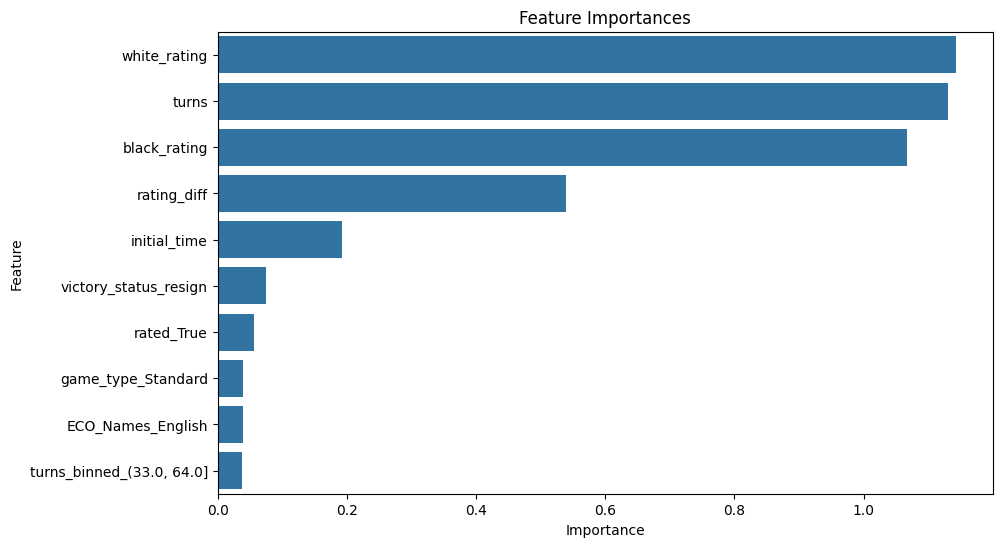

In [ ]:
plot_feature_importance(df=feature_importance_df,n=10)

In [ ]:
feature_importance_names:list=[]
feature_importance_scores:list=[]

method_names_list,precision_list,recall_list,accuracy_list,f1_list=train_model(xtrain_records=X_train_pca,ytrain_records=y_train,xtest_records=X_test_pca,ytest_records=y_test)

pca_features_fit_summary=pd.DataFrame(
    data={
          "ML Model":method_names_list,
          "Precision":precision_list,
          "Recall":recall_list,
          "Accuracy":accuracy_list,
          "F1":f1_list,
          }
    ).sort_values(by=['F1','Precision','Recall','Accuracy','ML Model'],ascending=[False,False,False,False,True])

pca_features_fit_summary['Features']='PCA Scaled Features'

Models Running :  Mon Apr 22 23:55:10 2024
AdaBoost Mon Apr 22 23:55:15 2024
Bagging Classifier Mon Apr 22 23:55:23 2024
Decision Tree Mon Apr 22 23:55:24 2024
Extra Trees Mon Apr 22 23:55:27 2024
Gradient Boosting Mon Apr 22 23:55:50 2024
Random Forest Mon Apr 22 23:56:02 2024
Linear Discriminant Analysis Mon Apr 22 23:56:02 2024
Logistic Regression Mon Apr 22 23:56:02 2024
Passive Aggressive Classifier Mon Apr 22 23:56:02 2024
Perceptron Mon Apr 22 23:56:02 2024
Ridge Classifier Mon Apr 22 23:56:02 2024
Stochastic Gradient Descent Mon Apr 22 23:56:03 2024
Gaussian Naive Bayes Mon Apr 22 23:56:03 2024
Nearest Centroid Mon Apr 22 23:56:03 2024
Quadratic Discriminant Analysis Mon Apr 22 23:56:03 2024
K-Nearest Neighbors Mon Apr 22 23:56:03 2024
SVM (Linear) Mon Apr 22 23:56:20 2024
SVM (RBF) Mon Apr 22 23:56:40 2024


In [ ]:
feature_importance_df=pd.DataFrame(data={'Feature_Name':feature_importance_names,'Feature_Score':feature_importance_scores,})
print(feature_importance_df.shape)
feature_importance_df=feature_importance_df.groupby(by=['Feature_Name'])['Feature_Score'].agg('sum').reset_index().sort_values(by=['Feature_Score'],ascending=[False])
print(feature_importance_df.shape)

(0, 2)
(0, 2)


In [ ]:
print(feature_importance_df.to_string())

Empty DataFrame
Columns: [Feature_Name, Feature_Score]
Index: []


In [ ]:
pca_features_fit_summary

,ML Model,Precision,Recall,Accuracy,F1,Features
16,SVM (Linear),0.6358,0.7826,0.6497,0.7016,PCA Scaled Features
6,Linear Discriminant Analysis,0.6618,0.7099,0.6564,0.6850,PCA Scaled Features
10,Ridge Classifier,0.6613,0.7099,0.6560,0.6847,PCA Scaled Features
0,AdaBoost,0.6583,0.7091,0.6533,0.6828,PCA Scaled Features
4,Gradient Boosting,0.6648,0.6987,0.6560,0.6813,PCA Scaled Features
7,Logistic Regression,0.6659,0.6964,0.6564,0.6808,PCA Scaled Features
17,SVM (RBF),0.6605,0.6927,0.6509,0.6762,PCA Scaled Features
11,Stochastic Gradient Descent,0.6535,0.6972,0.6462,0.6746,PCA Scaled Features
5,Random Forest,0.6722,0.6672,0.6536,0.6697,PCA Scaled Features
13,Nearest Centroid,0.6675,0.6304,0.6402,0.6484,PCA Scaled Features


In [ ]:
all_features_fit_summary=pd.concat(objs=[all_features_fit_summary,pca_features_fit_summary])
del pca_features_fit_summary
all_features_fit_summary=all_features_fit_summary.sort_values(by=['F1','Precision','Recall','Accuracy','ML Model'],ascending=[False,False,False,False,True])

In [ ]:
all_features_fit_summary

,ML Model,Precision,Recall,Accuracy,F1,Features
4,Gradient Boosting,0.7109,0.7594,0.7108,0.7343,Scaled Features
16,SVM (Linear),0.6177,0.8478,0.6438,0.7147,Scaled Features
16,SVM (Linear),0.6358,0.7826,0.6497,0.7016,PCA Scaled Features
5,Random Forest,0.6875,0.7024,0.6753,0.6948,Scaled Features
6,Linear Discriminant Analysis,0.6618,0.7099,0.6564,0.6850,PCA Scaled Features
10,Ridge Classifier,0.6613,0.7099,0.6560,0.6847,PCA Scaled Features
10,Ridge Classifier,0.6604,0.7069,0.6544,0.6828,Scaled Features
0,AdaBoost,0.6583,0.7091,0.6533,0.6828,PCA Scaled Features
0,AdaBoost,0.6508,0.7166,0.6485,0.6821,Scaled Features
6,Linear Discriminant Analysis,0.6592,0.7061,0.6533,0.6819,Scaled Features


In [ ]:
print(tabulate(tabular_data=all_features_fit_summary.head(10),headers="keys",tablefmt="rounded_grid"))

╭────┬──────────────────────────────┬─────────────┬──────────┬────────────┬────────┬─────────────────╮
│    │ ML Model                     │   Precision │   Recall │   Accuracy │     F1 │ Features        │
├────┼──────────────────────────────┼─────────────┼──────────┼────────────┼────────┼─────────────────┤
│  4 │ Gradient Boosting            │      0.7303 │   0.7796 │     0.7325 │ 0.7542 │ Scaled Features │
├────┼──────────────────────────────┼─────────────┼──────────┼────────────┼────────┼─────────────────┤
│ 16 │ SVM (Linear)                 │      0.6118 │   0.8801 │     0.643  │ 0.7218 │ Scaled Features │
├────┼──────────────────────────────┼─────────────┼──────────┼────────────┼────────┼─────────────────┤
│  9 │ Perceptron                   │      0.5755 │   0.8996 │     0.598  │ 0.702  │ Scaled Features │
├────┼──────────────────────────────┼─────────────┼──────────┼────────────┼────────┼─────────────────┤
│ 11 │ Stochastic Gradient Descent  │      0.6311 │   0.7886 │     0.6462

#### Statistical Analysis using R

In [ ]:
chess_df<-read.csv('Cleaned_chess_df.csv',header=TRUE)

In [ ]:
names(chess_df)

[1] "rated"          "turns"          "victory_status" "winner"        
 [5] "white_rating"   "black_rating"   "moves"          "turns_binned"  
 [9] "initial_time"   "game_type"      "ECO_Names"      "rating_diff"   
[13] "rating_level"   "train_test"

In [ ]:
dim(chess_df)

[1] 17114    14

In [ ]:
sum(is.na(chess_df))

[1] 0

In [ ]:
chess_df<-chess_df[,!(names(chess_df) %in% c('rated','victory_status','moves'))]

In [ ]:
# processing categorical features
chess_df$game_type<-as.factor(chess_df$game_type)
chess_df$ECO_Names<-as.factor(chess_df$ECO_Names)
chess_df$rating_level<-as.factor(chess_df$rating_level)
chess_df$turns_binned<-as.factor(chess_df$turns_binned)
unique(chess_df$winner)
chess_df$winner_numeric<-ifelse(chess_df$winner == "white",1,ifelse(chess_df$winner == "black",0,NA))
unique(chess_df$winner_numeric)

[1] "black" "white"

[1] 0 1

In [ ]:
dim(chess_df)

[1] 17114    12

In [ ]:
head(chess_df,1)

,turns,winner,white_rating,black_rating,turns_binned,initial_time,game_type,ECO_Names,rating_diff,rating_level,train_test,winner_numeric
,<int>,<chr>,<int>,<int>,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<int>,<dbl>
1,16,black,1322,1261,"(1.0, 33.0]",5,Blitz,Uncommon,61,Mid Rating,1,0


In [ ]:
# split the data in train and test files
train_df<-chess_df %>% filter(train_test == 1)
train_df<-train_df[,!(names(train_df) %in% c('train_test'))]

test_df <-chess_df %>% filter(train_test == 0)
test_df<-test_df[,!(names(test_df) %in% c('train_test'))]

In [ ]:
names(train_df)

[1] "turns"          "winner"         "white_rating"   "black_rating"  
 [5] "turns_binned"   "initial_time"   "game_type"      "ECO_Names"     
 [9] "rating_diff"    "rating_level"   "winner_numeric"

In [ ]:
c(dim(na.omit(train_df)),dim(train_df))

[1] 14579    11 14579    11

###### Multiple Logistic Regression

In [ ]:
logistic_model<-glm(winner_numeric~turns+white_rating+black_rating+initial_time+rating_diff,data=train_df,family="binomial")

In [ ]:
logistic_model


Call:  glm(formula = winner_numeric ~ turns + white_rating + black_rating + 
    initial_time + rating_diff, family = "binomial", data = train_df)

Coefficients:
 (Intercept)         turns  white_rating  black_rating  initial_time  
   0.3417931    -0.0028091     0.0040167    -0.0040885    -0.0002852  
 rating_diff  
   0.0002297  

Degrees of Freedom: 14578 Total (i.e. Null);  14573 Residual
Null Deviance:	    20170 
Residual Deviance: 17720 	AIC: 17740

In [ ]:
summary(logistic_model)


Call:
glm(formula = winner_numeric ~ turns + white_rating + black_rating + 
    initial_time + rating_diff, family = "binomial", data = train_df)

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)   0.3417931  0.1177500   2.903   0.0037 ** 
turns        -0.0028091  0.0005799  -4.844 1.27e-06 ***
white_rating  0.0040167  0.0001044  38.478  < 2e-16 ***
black_rating -0.0040885  0.0001046 -39.079  < 2e-16 ***
initial_time -0.0002852  0.0011719  -0.243   0.8077    
rating_diff   0.0002297  0.0001421   1.617   0.1060    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 20172  on 14578  degrees of freedom
Residual deviance: 17724  on 14573  degrees of freedom
AIC: 17736

Number of Fisher Scoring iterations: 4


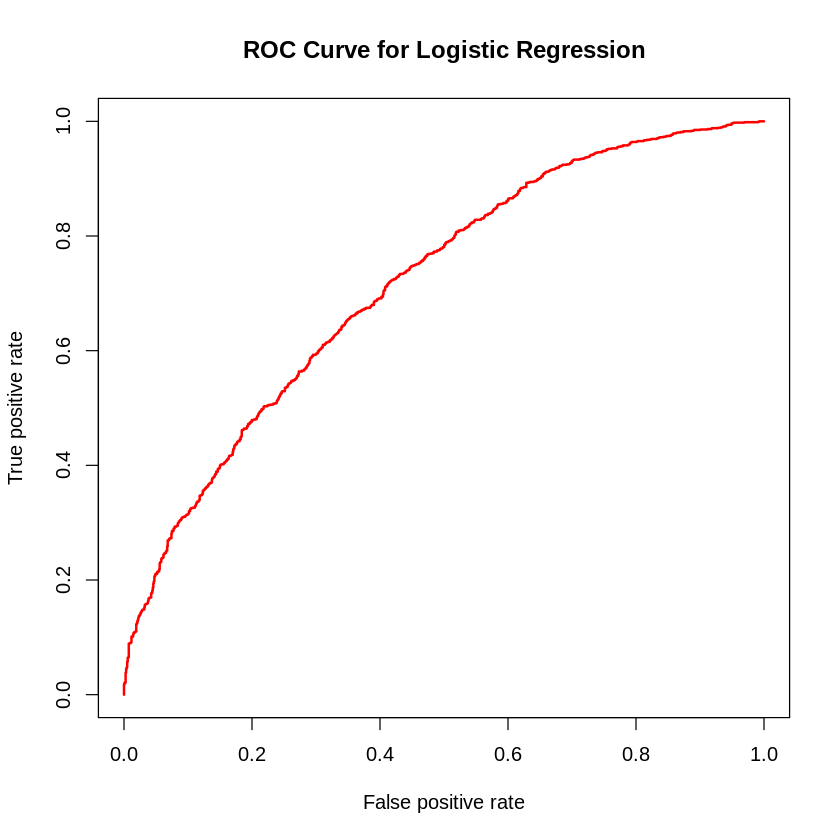

In [ ]:
logistic_pred<-predict(logistic_model,test_df,type="response")
pred<-prediction(logistic_pred,test_df$winner_numeric)
perf<-performance(pred,measure="tpr",x.measure="fpr")
plot(perf,col="red",lwd=2,main="ROC Curve for Logistic Regression")

###### Cross-Validation (k-Fold)

In [ ]:
cv_model<-train(winner_numeric~turns+white_rating+black_rating+initial_time+rating_diff,data=train_df,method="glm",family="binomial",trControl=trainControl(method="cv",number=10))

In [ ]:
cv_model

Generalized Linear Model 

14579 samples
    5 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 13121, 13121, 13121, 13122, 13121, 13121, ... 
Resampling results:

  RMSE       Rsquared   MAE      
  0.4588901  0.1558277  0.4220251


In [ ]:
summary(cv_model)


Call:
NULL

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)   0.3417931  0.1177500   2.903   0.0037 ** 
turns        -0.0028091  0.0005799  -4.844 1.27e-06 ***
white_rating  0.0040167  0.0001044  38.478  < 2e-16 ***
black_rating -0.0040885  0.0001046 -39.079  < 2e-16 ***
initial_time -0.0002852  0.0011719  -0.243   0.8077    
rating_diff   0.0002297  0.0001421   1.617   0.1060    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 20172  on 14578  degrees of freedom
Residual deviance: 17724  on 14573  degrees of freedom
AIC: 17736

Number of Fisher Scoring iterations: 4


###### Linear Discriminant Analysis (LDA) & Quadratic Discriminant Analysis (QDA)

In [ ]:
lda_model<-lda(winner~turns+white_rating+black_rating+initial_time+rating_diff,data=train_df)

In [ ]:
lda_model

Call:
lda(winner ~ turns + white_rating + black_rating + initial_time + 
    rating_diff, data = train_df)

Prior probabilities of groups:
    black     white 
0.4741752 0.5258248 

Group means:
         turns white_rating black_rating initial_time rating_diff
black 59.63966     1545.620     1636.469     13.74165    170.9271
white 56.54853     1633.002     1533.940     13.89225    178.6927

Coefficients of linear discriminants:
                       LD1
turns        -0.0033443152
white_rating  0.0042408245
black_rating -0.0043388329
initial_time -0.0003827855
rating_diff  -0.0001217031

In [ ]:
summary(lda_model)

        Length Class  Mode     
prior    2     -none- numeric  
counts   2     -none- numeric  
means   10     -none- numeric  
scaling  5     -none- numeric  
lev      2     -none- character
svd      1     -none- numeric  
N        1     -none- numeric  
call     3     -none- call     
terms    3     terms  call     
xlevels  0     -none- list     

In [ ]:
lda_predictions<-predict(lda_model,test_df)
head(lda_predictions$class)

[1] white black white white white black
Levels: black white

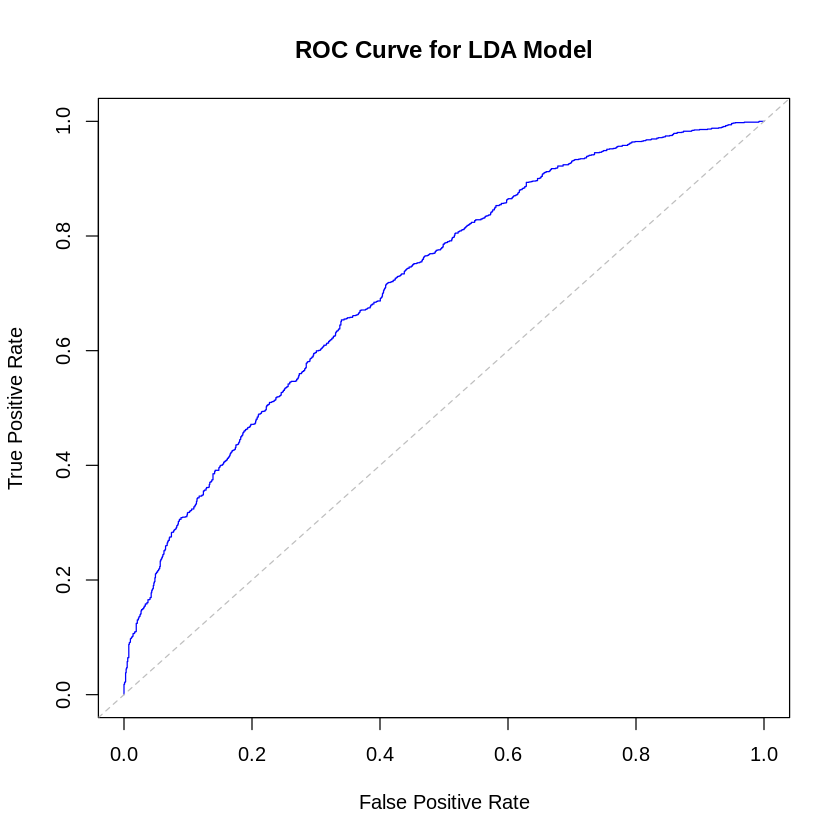

In [ ]:
lda_probabilities<-lda_predictions$posterior
pred<-prediction(lda_probabilities[,"white"],test_df$winner)
perf<-performance(pred,"tpr","fpr")
plot(perf,col="blue",main="ROC Curve for LDA Model",xlab="False Positive Rate",ylab="True Positive Rate")
abline(a=0,b=1,lty=2,col="gray")

In [ ]:
qda_model<-qda(winner~turns+white_rating+black_rating+initial_time+rating_diff,data=train_df)

In [ ]:
qda_model

Call:
qda(winner ~ turns + white_rating + black_rating + initial_time + 
    rating_diff, data = train_df)

Prior probabilities of groups:
    black     white 
0.4741752 0.5258248 

Group means:
         turns white_rating black_rating initial_time rating_diff
black 59.63966     1545.620     1636.469     13.74165    170.9271
white 56.54853     1633.002     1533.940     13.89225    178.6927

In [ ]:
summary(qda_model)

        Length Class  Mode     
prior    2     -none- numeric  
counts   2     -none- numeric  
means   10     -none- numeric  
scaling 50     -none- numeric  
ldet     2     -none- numeric  
lev      2     -none- character
N        1     -none- numeric  
call     3     -none- call     
terms    3     terms  call     
xlevels  0     -none- list     

In [ ]:
qda_predictions<-predict(qda_model,test_df)
head(qda_predictions$class)

[1] white black white white white black
Levels: black white

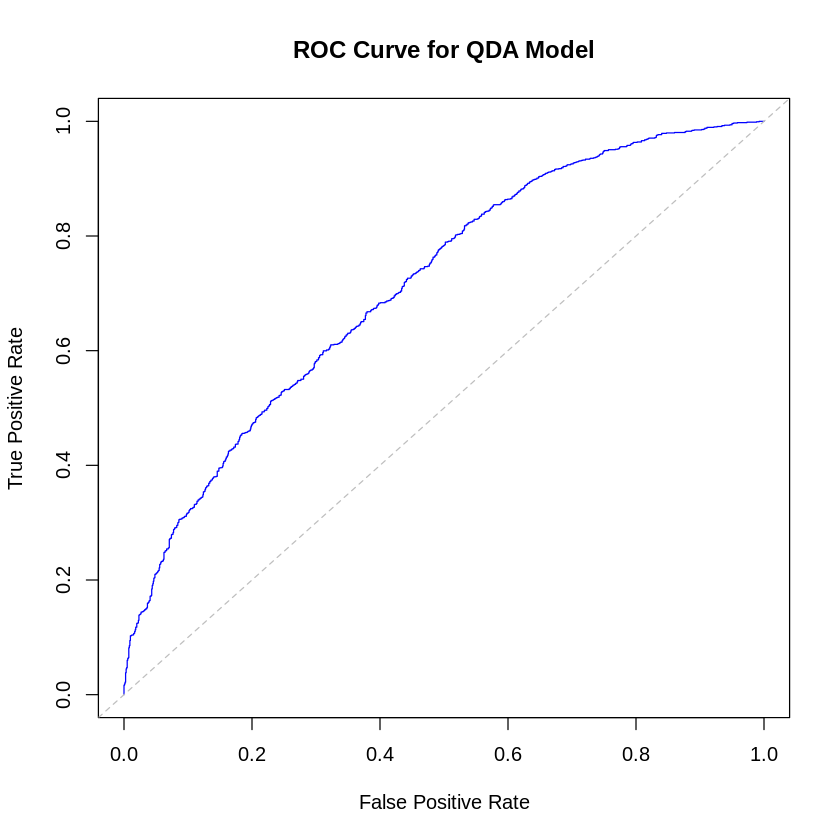

In [ ]:
qda_probabilities<-qda_predictions$posterior
pred<-prediction(qda_probabilities[,"white"],test_df$winner)
perf<-performance(pred,"tpr","fpr")
plot(perf,col="blue",main="ROC Curve for QDA Model",xlab="False Positive Rate",ylab="True Positive Rate")
abline(a=0,b=1,lty=2,col="gray")

###### Ridge Regression and Lasso

In [ ]:
x_train<-as.matrix(train_df[,c("turns","white_rating","black_rating","initial_time","rating_diff")])
y_train<-train_df$winner_numeric

In [ ]:
ridge_model<-cv.glmnet(x_train,y_train,alpha=0,family="binomial")

In [ ]:
ridge_model


Call:  cv.glmnet(x = x_train, y = y_train, alpha = 0, family = "binomial") 

Measure: Binomial Deviance 

      Lambda Index Measure       SE Nonzero
min 0.008901   100   1.220 0.004168       5
1se 0.014172    95   1.223 0.003826       5

In [ ]:
summary(ridge_model)

           Length Class  Mode     
lambda     100    -none- numeric  
cvm        100    -none- numeric  
cvsd       100    -none- numeric  
cvup       100    -none- numeric  
cvlo       100    -none- numeric  
nzero      100    -none- numeric  
call         5    -none- call     
name         1    -none- character
glmnet.fit  13    lognet list     
lambda.min   1    -none- numeric  
lambda.1se   1    -none- numeric  
index        2    -none- numeric  

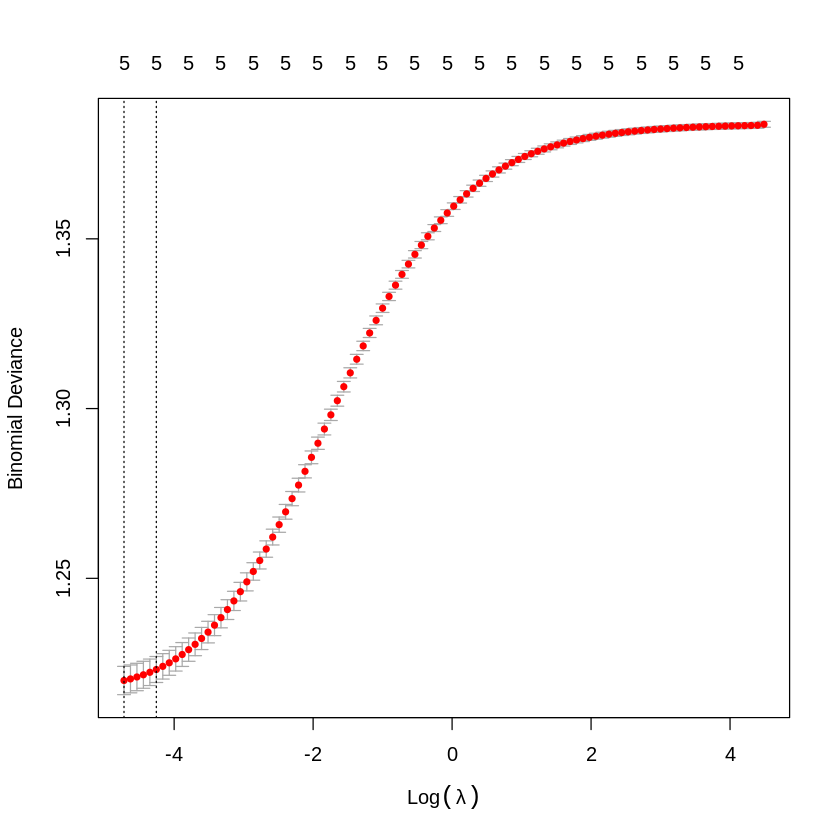

In [ ]:
plot(ridge_model)

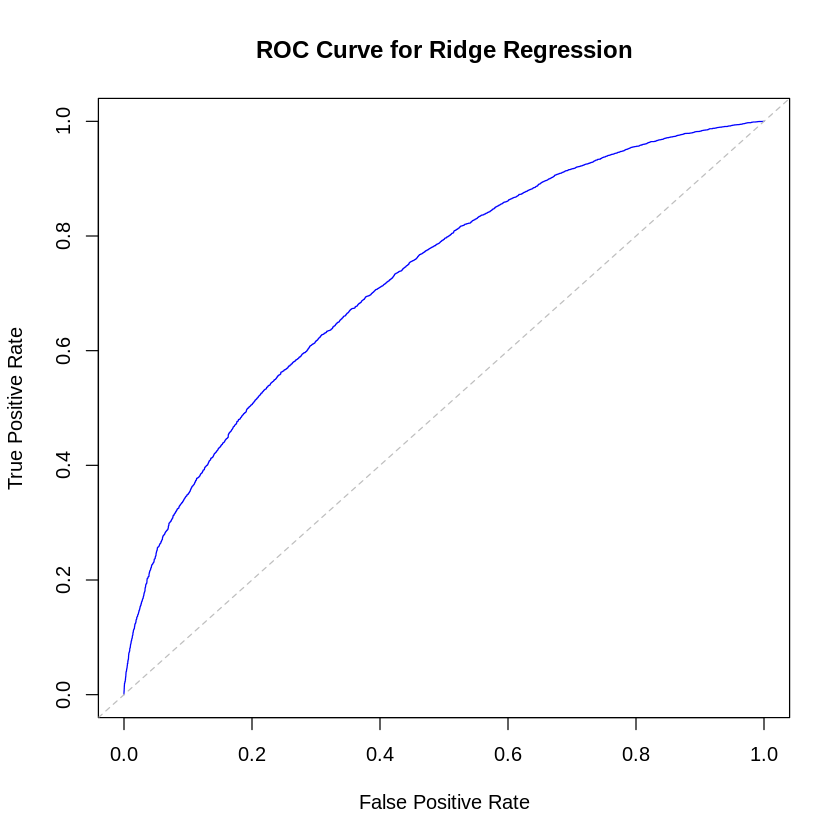

In [ ]:
best_lambda<-ridge_model$lambda.min
ridge_probabilities<-predict(ridge_model,newx=x_train,s=best_lambda,type="response")
roc_prediction<-prediction(ridge_probabilities,y_train)
roc_performance<-performance(roc_prediction,"tpr","fpr")
plot(roc_performance,col="blue",main="ROC Curve for Ridge Regression",xlab="False Positive Rate",ylab="True Positive Rate")
abline(a=0,b=1,lty=2,col="gray")

In [ ]:
lasso_model<-cv.glmnet(x_train,y_train,alpha=1,family="binomial")

In [ ]:
lasso_model


Call:  cv.glmnet(x = x_train, y = y_train, alpha = 1, family = "binomial") 

Measure: Binomial Deviance 

      Lambda Index Measure       SE Nonzero
min 0.001023    49   1.217 0.003077       4
1se 0.007923    27   1.219 0.002449       3

In [ ]:
summary(lasso_model)

           Length Class  Mode     
lambda     49     -none- numeric  
cvm        49     -none- numeric  
cvsd       49     -none- numeric  
cvup       49     -none- numeric  
cvlo       49     -none- numeric  
nzero      49     -none- numeric  
call        5     -none- call     
name        1     -none- character
glmnet.fit 13     lognet list     
lambda.min  1     -none- numeric  
lambda.1se  1     -none- numeric  
index       2     -none- numeric  

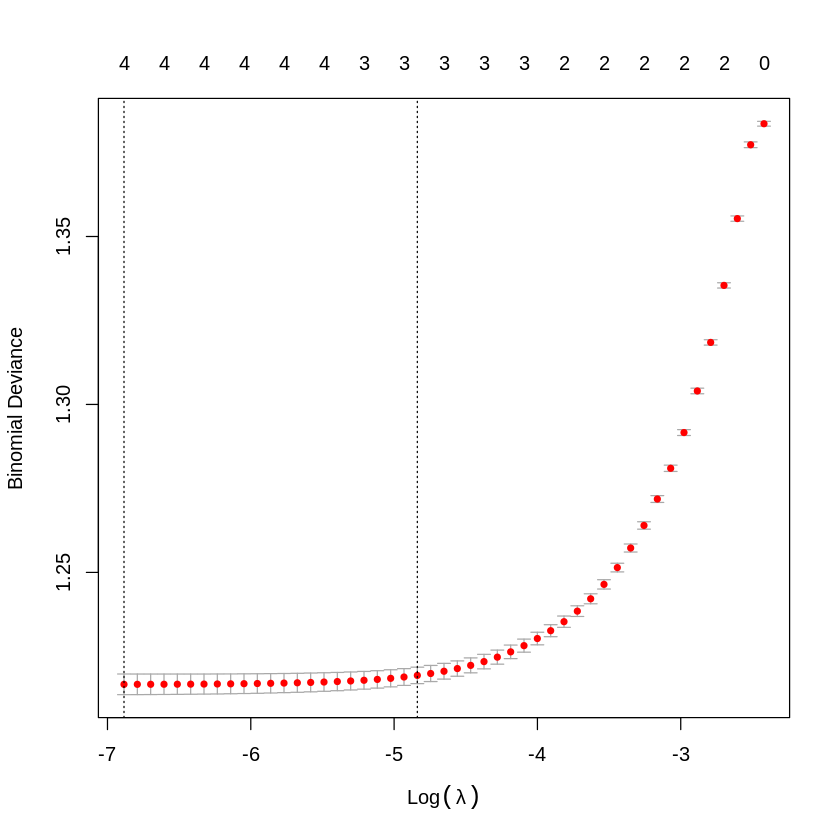

In [ ]:
plot(lasso_model)

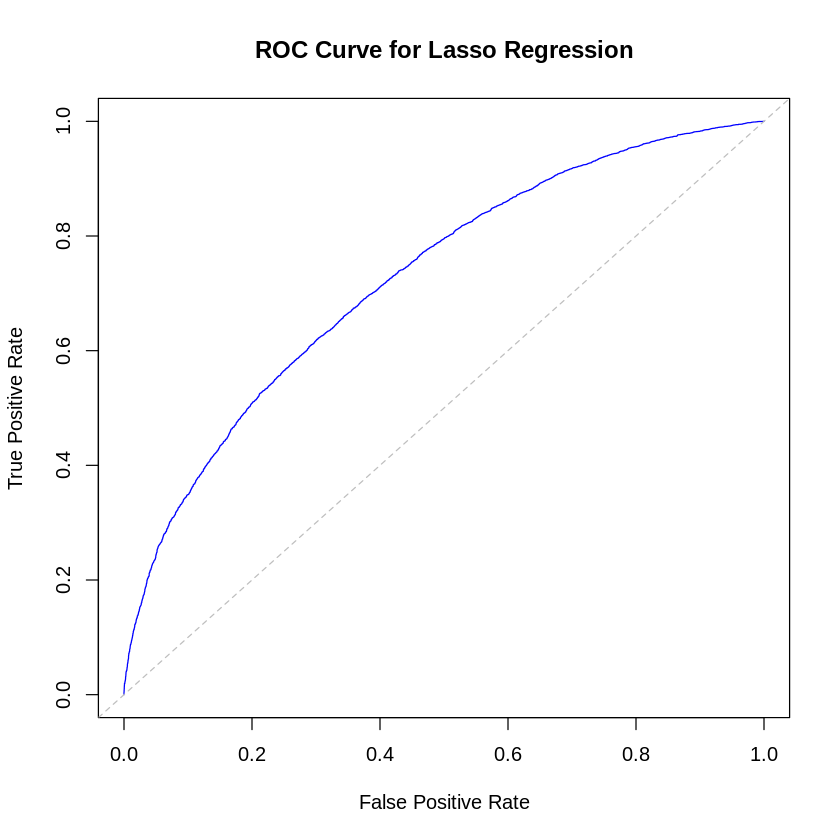

In [ ]:
best_lambda<-lasso_model$lambda.min
lasso_probabilities<-predict(lasso_model,newx=x_train,s=best_lambda,type="response")
roc_prediction<-prediction(lasso_probabilities,y_train)
roc_performance<-performance(roc_prediction,"tpr","fpr")
plot(roc_performance,col="blue",main="ROC Curve for Lasso Regression",xlab="False Positive Rate",ylab="True Positive Rate")
abline(a=0,b=1,lty=2,col="gray")

###### Best Subset Selection

In [ ]:
best_subset<-regsubsets(winner_numeric~turns+white_rating+black_rating+initial_time+rating_diff,data=train_df,nbest=1,nvmax=5)

In [ ]:
best_subset

Subset selection object
Call: regsubsets.formula(winner_numeric ~ turns + white_rating + black_rating + 
    initial_time + rating_diff, data = train_df, nbest = 1, nvmax = 5)
5 Variables  (and intercept)
             Forced in Forced out
turns            FALSE      FALSE
white_rating     FALSE      FALSE
black_rating     FALSE      FALSE
initial_time     FALSE      FALSE
rating_diff      FALSE      FALSE
1 subsets of each size up to 5
Selection Algorithm: exhaustive

In [ ]:
summary(best_subset)

Subset selection object
Call: regsubsets.formula(winner_numeric ~ turns + white_rating + black_rating + 
    initial_time + rating_diff, data = train_df, nbest = 1, nvmax = 5)
5 Variables  (and intercept)
             Forced in Forced out
turns            FALSE      FALSE
white_rating     FALSE      FALSE
black_rating     FALSE      FALSE
initial_time     FALSE      FALSE
rating_diff      FALSE      FALSE
1 subsets of each size up to 5
Selection Algorithm: exhaustive
         turns white_rating black_rating initial_time rating_diff
1  ( 1 ) " "   " "          "*"          " "          " "        
2  ( 1 ) " "   "*"          "*"          " "          " "        
3  ( 1 ) "*"   "*"          "*"          " "          " "        
4  ( 1 ) "*"   "*"          "*"          " "          "*"        
5  ( 1 ) "*"   "*"          "*"          "*"          "*"        

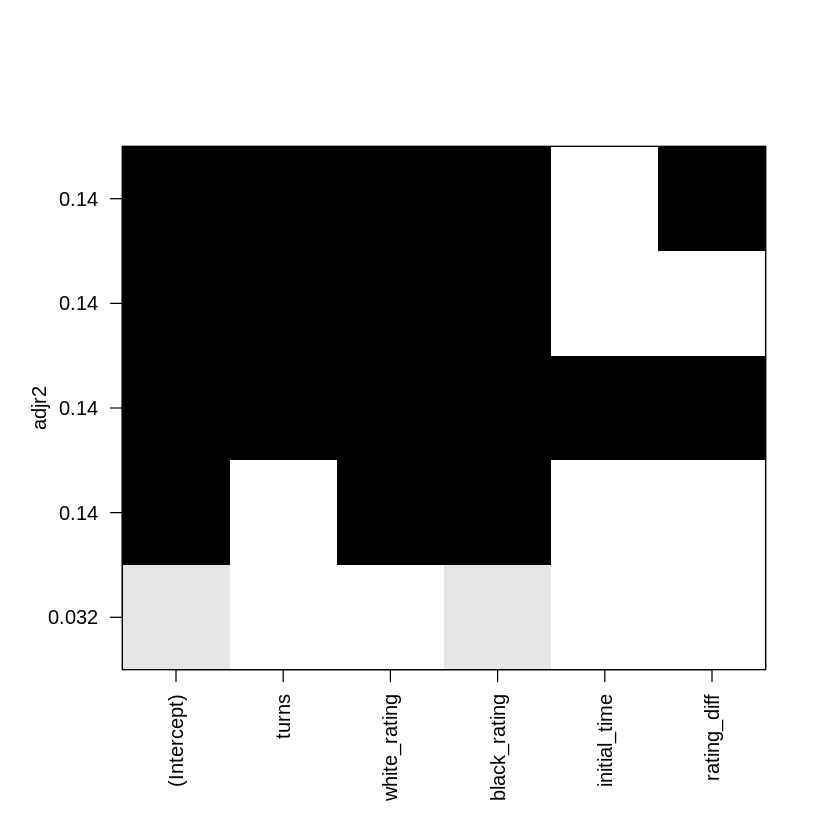

In [ ]:
plot(best_subset,scale="adjr2")

###### Forward Stepwise Selection

In [ ]:
empty_model<-glm(winner_numeric~1,data=train_df,family="binomial")
full_model<-glm(winner_numeric~turns+white_rating+black_rating+initial_time+rating_diff,data=train_df,family="binomial")

In [ ]:
forward_model<-step(empty_model,scope=list(lower=empty_model,upper=full_model),direction="forward")

Start:  AIC=20173.88
winner_numeric ~ 1

               Df Deviance   AIC
+ black_rating  1    19702 19706
+ white_rating  1    19831 19835
+ turns         1    20137 20141
+ rating_diff   1    20165 20169
<none>               20172 20174
+ initial_time  1    20172 20176

Step:  AIC=19706
winner_numeric ~ black_rating

               Df Deviance   AIC
+ white_rating  1    17752 17758
+ rating_diff   1    19693 19699
+ turns         1    19694 19700
<none>               19702 19706
+ initial_time  1    19701 19707

Step:  AIC=17757.84
winner_numeric ~ black_rating + white_rating

               Df Deviance   AIC
+ turns         1    17727 17735
+ rating_diff   1    17748 17756
<none>               17752 17758
+ initial_time  1    17752 17760

Step:  AIC=17734.77
winner_numeric ~ black_rating + white_rating + turns

               Df Deviance   AIC
+ rating_diff   1    17724 17734
<none>               17727 17735
+ initial_time  1    17727 17737

Step:  AIC=17734.19
winner_numeric ~ blac

In [ ]:
forward_model


Call:  glm(formula = winner_numeric ~ black_rating + white_rating + 
    turns + rating_diff, family = "binomial", data = train_df)

Coefficients:
 (Intercept)  black_rating  white_rating         turns   rating_diff  
   0.3361295    -0.0040878     0.0040172    -0.0028058     0.0002276  

Degrees of Freedom: 14578 Total (i.e. Null);  14574 Residual
Null Deviance:	    20170 
Residual Deviance: 17720 	AIC: 17730

In [ ]:
summary(forward_model)


Call:
glm(formula = winner_numeric ~ black_rating + white_rating + 
    turns + rating_diff, family = "binomial", data = train_df)

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)   0.3361295  0.1154253   2.912  0.00359 ** 
black_rating -0.0040878  0.0001046 -39.086  < 2e-16 ***
white_rating  0.0040172  0.0001044  38.491  < 2e-16 ***
turns        -0.0028058  0.0005798  -4.840  1.3e-06 ***
rating_diff   0.0002276  0.0001418   1.605  0.10850    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 20172  on 14578  degrees of freedom
Residual deviance: 17724  on 14574  degrees of freedom
AIC: 17734

Number of Fisher Scoring iterations: 4


###### Backward Stepwise Selection

In [ ]:
backward_model<-step(full_model,direction="backward")

Start:  AIC=17736.13
winner_numeric ~ turns + white_rating + black_rating + initial_time + 
    rating_diff

               Df Deviance   AIC
- initial_time  1    17724 17734
<none>               17724 17736
- rating_diff   1    17727 17737
- turns         1    17748 17758
- white_rating  1    19684 19694
- black_rating  1    19760 19770

Step:  AIC=17734.19
winner_numeric ~ turns + white_rating + black_rating + rating_diff

               Df Deviance   AIC
<none>               17724 17734
- rating_diff   1    17727 17735
- turns         1    17748 17756
- white_rating  1    19687 19695
- black_rating  1    19762 19770


In [ ]:
backward_model


Call:  glm(formula = winner_numeric ~ turns + white_rating + black_rating + 
    rating_diff, family = "binomial", data = train_df)

Coefficients:
 (Intercept)         turns  white_rating  black_rating   rating_diff  
   0.3361295    -0.0028058     0.0040172    -0.0040878     0.0002276  

Degrees of Freedom: 14578 Total (i.e. Null);  14574 Residual
Null Deviance:	    20170 
Residual Deviance: 17720 	AIC: 17730

In [ ]:
summary(backward_model)


Call:
glm(formula = winner_numeric ~ turns + white_rating + black_rating + 
    rating_diff, family = "binomial", data = train_df)

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)   0.3361295  0.1154253   2.912  0.00359 ** 
turns        -0.0028058  0.0005798  -4.840  1.3e-06 ***
white_rating  0.0040172  0.0001044  38.491  < 2e-16 ***
black_rating -0.0040878  0.0001046 -39.086  < 2e-16 ***
rating_diff   0.0002276  0.0001418   1.605  0.10850    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 20172  on 14578  degrees of freedom
Residual deviance: 17724  on 14574  degrees of freedom
AIC: 17734

Number of Fisher Scoring iterations: 4


###### Partial Least Squares (PLS)

In [ ]:
pls_model<-plsr(winner_numeric~turns+white_rating+black_rating+initial_time+rating_diff,data=train_df,validation="CV")

In [ ]:
pls_model

Partial least squares regression, fitted with the kernel algorithm.
Cross-validated using 10 random segments.
Call:
plsr(formula = winner_numeric ~ turns + white_rating + black_rating +     initial_time + rating_diff, data = train_df, validation = "CV")

In [ ]:
summary(pls_model)

Data: 	X dimension: 14579 5 
	Y dimension: 14579 1
Fit method: kernelpls
Number of components considered: 5

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps
CV          0.4994   0.4632   0.4623   0.4622   0.4619   0.4619
adjCV       0.4994   0.4631   0.4623   0.4622   0.4619   0.4619

TRAINING: % variance explained
                1 comps  2 comps  3 comps  4 comps  5 comps
X                  17.3    82.47    99.34    99.86    100.0
winner_numeric     14.1    14.34    14.39    14.50     14.5


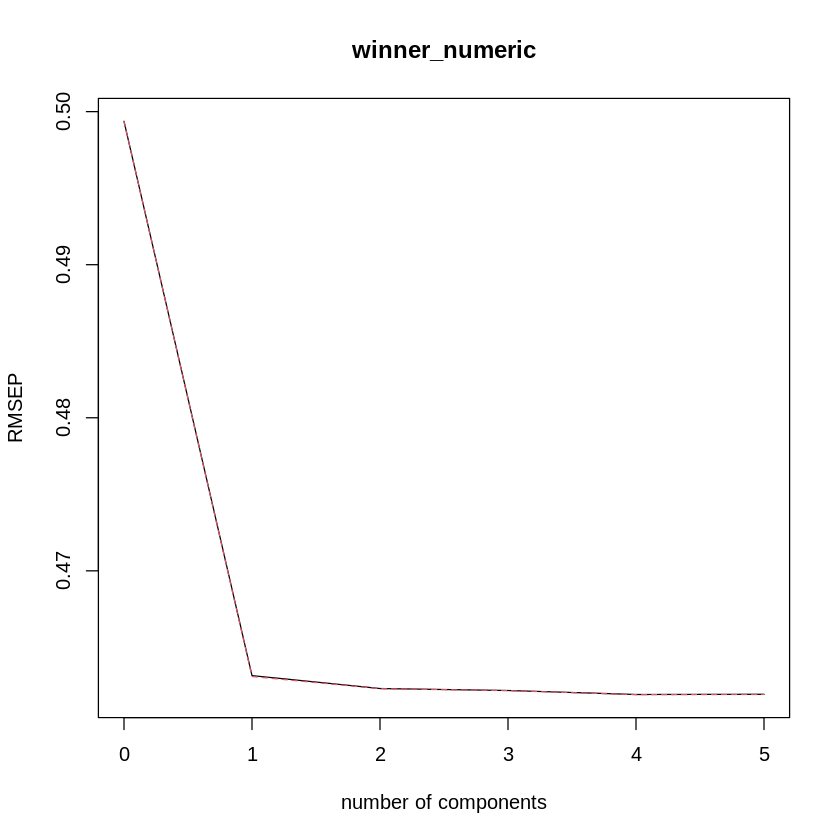

In [ ]:
# Root Mean Squared Error of Prediction
validationplot(pls_model,val.type="RMSEP")

###### K-Nearest Neighbors (KNN)

In [ ]:
x_train<-train_df[,c("turns","white_rating","black_rating","initial_time","rating_diff")]
x_test<-test_df[,c("turns","white_rating","black_rating","initial_time","rating_diff")]

y_train<-train_df$winner_numeric

In [ ]:
knn_predictions<-knn(train=x_train,test=x_test,cl=y_train,k=5)

In [ ]:
knn_predictions

[1] 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0
  [38] 1 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1 1
  [75] 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1
 [112] 0 0 1 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0
 [149] 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 1 1 1 0 1
 [186] 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 1 1 0 1 0 0 1
 [223] 1 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0
 [260] 1 1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1
 [297] 0 1 0 1 1 0 1 0 1 0 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1
 [334] 1 0 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 0 0
 [371] 1 0 1 0 0 1 0 1 1 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1
 [408] 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 1
 [445] 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 1
 [482] 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1
 [519] 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1
 [556] 0 1 0 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1
 [593] 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 0 1 1 0
 [630] 1 1 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 0
 [667] 1 1 0 0 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 1 1
 [704] 0 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0
 [741] 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1
 [778] 1 0 0 0 1 0 1 1 1 1 1 0 0 0 0 1 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1
 [815] 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 1 1 0 0 1 1 1 0
 [852] 1 1 0 0 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1
 [889] 1 0 1 1 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1
 [926] 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 1 0
 [963] 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 0
[1000] 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0
[1037] 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 0 1 1 0 1
[1074] 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 1 1 0 1 0 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 0 1
[1111] 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 1 0
[1148] 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 1
[1185] 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0
[1222] 0 1 0 1 1 1 1 0 1 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 0 0 1 0 0 1
[1259] 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 1
[1296] 1 1 1 0 0 1 1 1 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0
[1333] 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 0 0 1 0
[1370] 1 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 1 0 0
[1407] 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0 1 0 0 0 1 0 1 1 1 1 0 1 0
[1444] 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 0 1
[1481] 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1
[1518] 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1
[1555] 0 0 1 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1
[1592] 0 1 1 1 1 1 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 0
[1629] 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1
[1666] 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0
[1703] 0 1 0 1 0 1 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1
[1740] 0 1 0 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0
[1777] 1 1 0 1 0 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 0 1 1 1 0 1 0
[1814] 0 1 1 0 1 0 1 0 0 1 0 0 1 1

In [ ]:
summary(knn_predictions)

0    1 
1173 1362

In [ ]:
head(knn_predictions)

[1] 1 1 1 1 1 0
Levels: 0 1

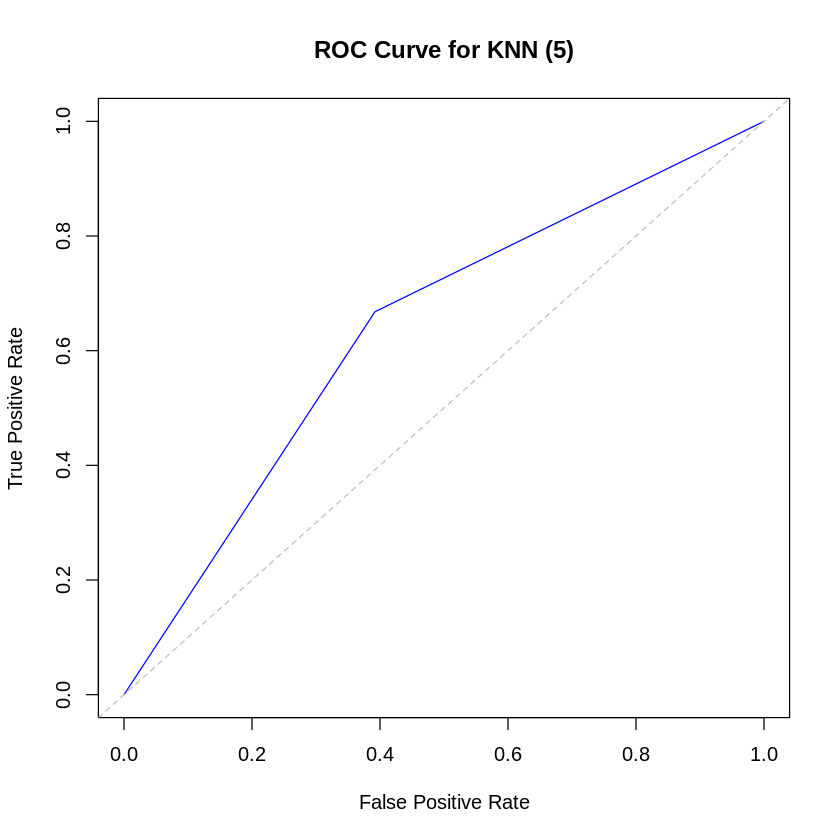

In [ ]:
knn_probabilities<-ifelse(knn_predictions == 1,1,0)
roc_prediction<-prediction(knn_probabilities,test_df$winner_numeric)
roc_performance<-performance(roc_prediction,"tpr","fpr")
plot(roc_performance,col="blue",main="ROC Curve for KNN (5)",xlab="False Positive Rate",ylab="True Positive Rate")
abline(a=0,b=1,lty=2,col="gray")

###### Tree Based Models (Classification Trees and Random Forests)

In [ ]:
tree_model<-rpart(winner_numeric~turns+white_rating+black_rating+initial_time+rating_diff,data=train_df,method='class')

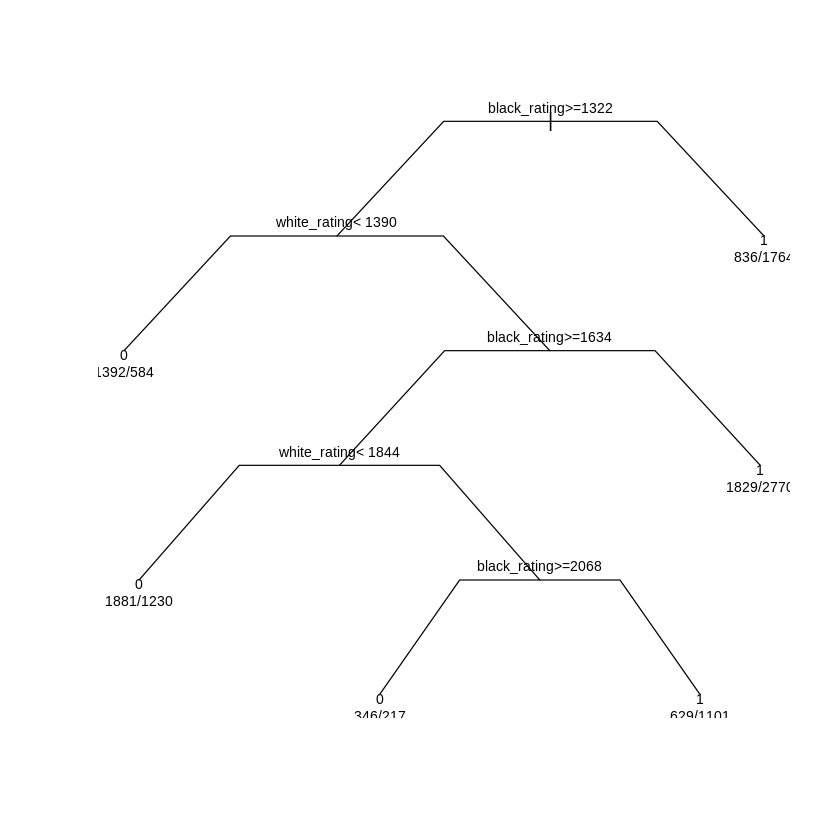

In [ ]:
plot(tree_model,uniform=TRUE,branch=0.5,compress=TRUE)
text(tree_model,use.n=TRUE,cex=0.7)

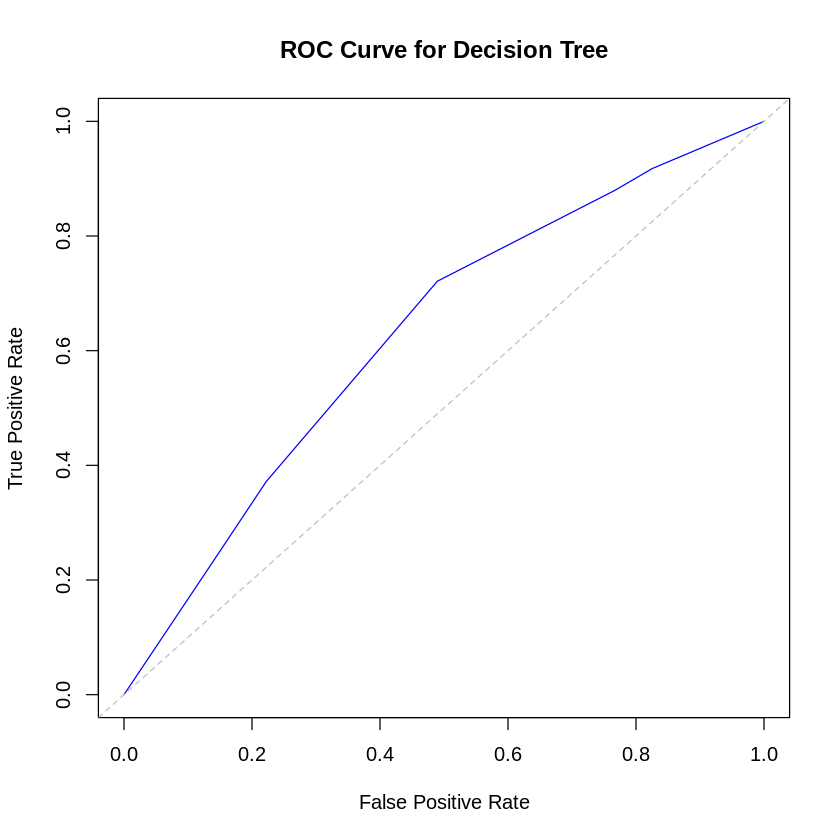

In [ ]:
tree_probabilities<-predict(tree_model,newdata=x_test,type="prob")
tree_prob_for_roc<-tree_probabilities[,"1"]
roc_prediction<-prediction(tree_prob_for_roc,test_df$winner_numeric)
roc_performance<-performance(roc_prediction,"tpr","fpr")
plot(roc_performance,col="blue",main="ROC Curve for Decision Tree",xlab="False Positive Rate",ylab="True Positive Rate")
abline(a=0,b=1,lty=2,col="gray")

In [ ]:
train_df$winner_factor<-as.factor(train_df$winner)
test_df$winner_factor<-as.factor(test_df$winner)

In [ ]:
rf_model<-randomForest(winner_factor~turns+white_rating+black_rating+initial_time+rating_diff,data=train_df,ntree=500)

In [ ]:
rf_model


Call:
 randomForest(formula = winner_factor ~ turns + white_rating +      black_rating + initial_time + rating_diff, data = train_df,      ntree = 500, method = "class") 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 30.61%
Confusion matrix:
      black white class.error
black  4592  2321   0.3357442
white  2141  5525   0.2792852

In [ ]:
summary(rf_model)

                Length Class  Mode     
call                5  -none- call     
type                1  -none- character
predicted       14579  factor numeric  
err.rate         1500  -none- numeric  
confusion           6  -none- numeric  
votes           29158  matrix numeric  
oob.times       14579  -none- numeric  
classes             2  -none- character
importance          5  -none- numeric  
importanceSD        0  -none- NULL     
localImportance     0  -none- NULL     
proximity           0  -none- NULL     
ntree               1  -none- numeric  
mtry                1  -none- numeric  
forest             14  -none- list     
y               14579  factor numeric  
test                0  -none- NULL     
inbag               0  -none- NULL     
terms               3  terms  call     

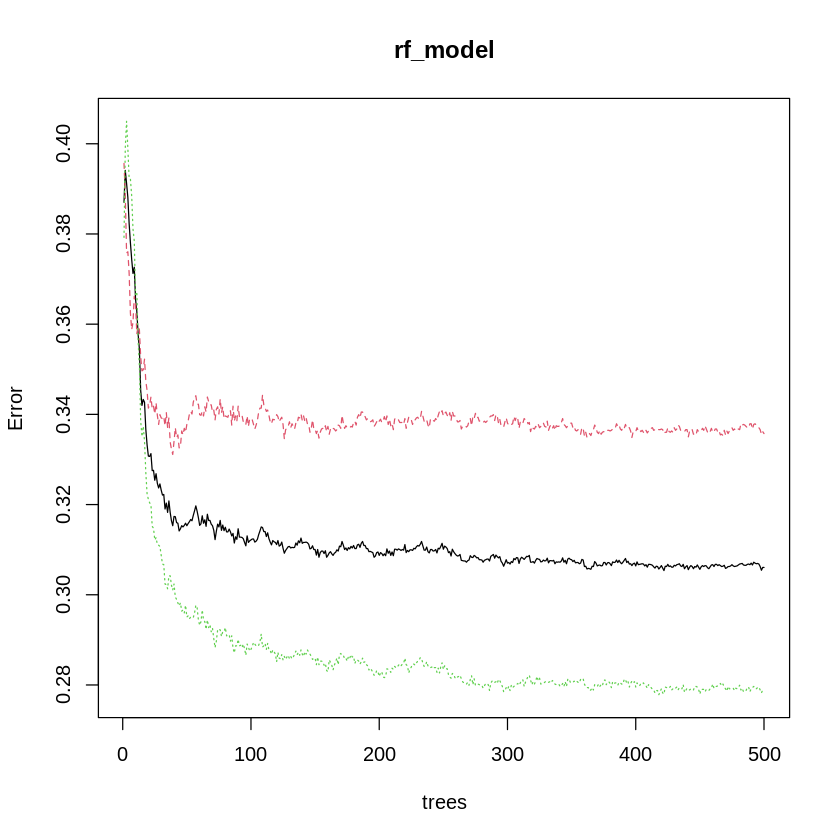

In [ ]:
plot(rf_model)

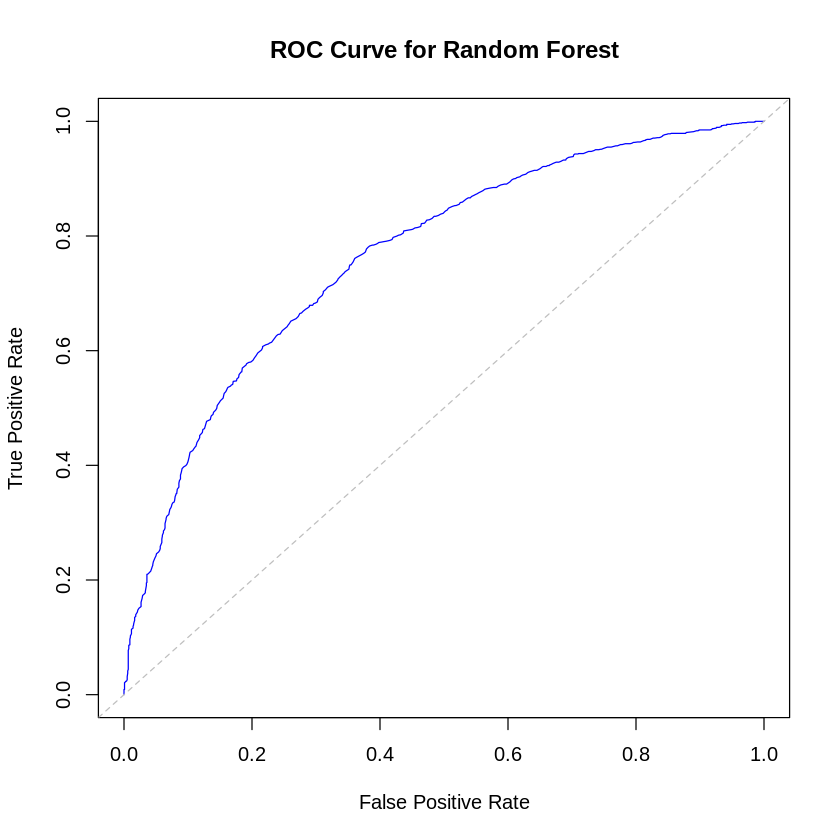

In [ ]:
rf_probabilities<-predict(rf_model,newdata=test_df,type="prob")
rf_prob_for_roc<-rf_probabilities[,"white"]
roc_prediction<-prediction(rf_prob_for_roc,test_df$winner_factor)
roc_performance<-performance(roc_prediction,"tpr","fpr")
plot(roc_performance,col="blue",main="ROC Curve for Random Forest",xlab="False Positive Rate",ylab="True Positive Rate")
abline(a=0,b=1,lty=2,col="gray")

###### Bagging

In [ ]:
bagging_model<-randomForest(winner_factor~turns+white_rating+black_rating+initial_time+rating_diff,data=train_df,ntree=500,mtry=5,importance=TRUE)

In [ ]:
bagging_model


Call:
 randomForest(formula = winner_factor ~ turns + white_rating +      black_rating + initial_time + rating_diff, data = train_df,      ntree = 500, mtry = 5, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 5

        OOB estimate of  error rate: 32.15%
Confusion matrix:
      black white class.error
black  4486  2427   0.3510777
white  2260  5406   0.2948082

In [ ]:
summary(bagging_model)

                Length Class  Mode     
call                6  -none- call     
type                1  -none- character
predicted       14579  factor numeric  
err.rate         1500  -none- numeric  
confusion           6  -none- numeric  
votes           29158  matrix numeric  
oob.times       14579  -none- numeric  
classes             2  -none- character
importance         20  -none- numeric  
importanceSD       15  -none- numeric  
localImportance     0  -none- NULL     
proximity           0  -none- NULL     
ntree               1  -none- numeric  
mtry                1  -none- numeric  
forest             14  -none- list     
y               14579  factor numeric  
test                0  -none- NULL     
inbag               0  -none- NULL     
terms               3  terms  call     

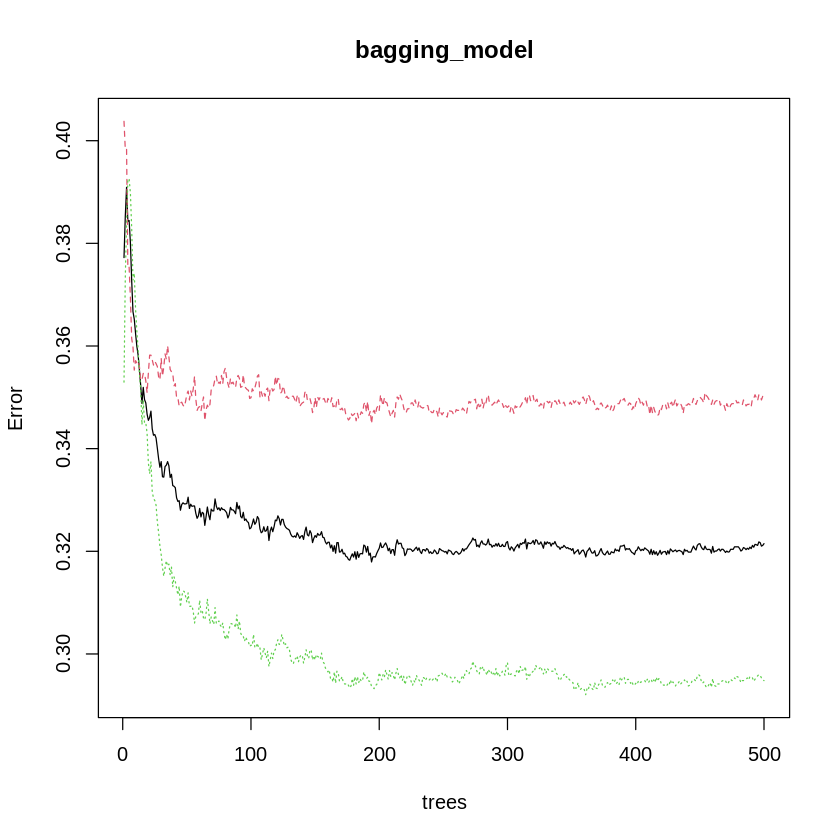

In [ ]:
plot(bagging_model)

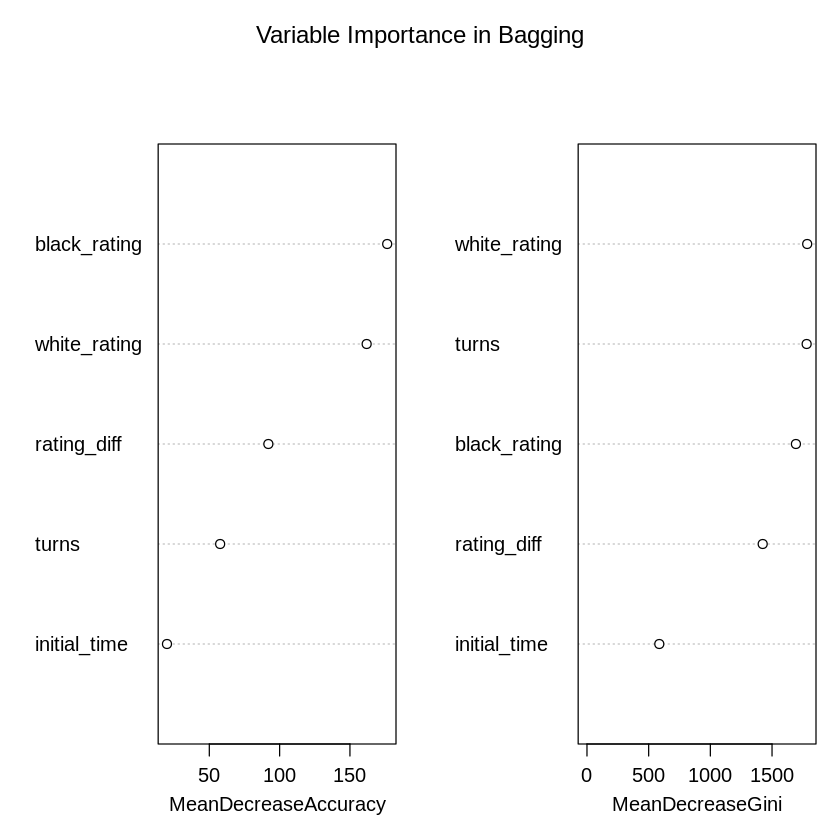

In [ ]:
varImpPlot(bagging_model,main="Variable Importance in Bagging")

###### Boosting

In [ ]:
c(train_df$winner_numeric[0:10],train_df$winner[0:10])

[1] "0"     "1"     "1"     "1"     "0"     "0"     "1"     "1"     "0"    
[10] "0"     "black" "white" "white" "white" "black" "black" "white" "white"
[19] "black" "black"

In [ ]:
x_train<-as.matrix(train_df[,c("turns","white_rating","black_rating","initial_time","rating_diff")])
y_train<-train_df$winner_numeric

In [ ]:
dtrain<-xgb.DMatrix(data=x_train,label=y_train)
boosting_model<-xgb.train(list(objective="binary:logistic",eta=0.1,max_depth=6),dtrain,nrounds=100)

In [ ]:
boosting_model

##### xgb.Booster
raw: 327.6 Kb 
call:
  xgb.train(params = list(objective = "binary:logistic", eta = 0.1, 
    max_depth = 6), data = dtrain, nrounds = 100)
params (as set within xgb.train):
  objective = "binary:logistic", eta = "0.1", max_depth = "6", validate_parameters = "TRUE"
xgb.attributes:
  niter
callbacks:
  cb.print.evaluation(period = print_every_n)
# of features: 5 
niter: 100
nfeatures : 5 

In [ ]:
summary(boosting_model)

              Length Class              Mode       
handle             1 xgb.Booster.handle externalptr
raw           335382 -none-             raw        
niter              1 -none-             numeric    
call               4 -none-             call       
params             4 -none-             list       
callbacks          1 -none-             list       
feature_names      5 -none-             character  
nfeatures          1 -none-             numeric    

In [ ]:
xgb.importance(model=boosting_model)

Feature,Gain,Cover,Frequency
<chr>,<dbl>,<dbl>,<dbl>
turns,0.56675904,0.65207372,0.29082426
white_rating,0.18154013,0.13596403,0.20736133
black_rating,0.14359109,0.16019073,0.22265422
rating_diff,0.09031450,0.04014986,0.19180923
initial_time,0.01779523,0.01162165,0.08735096


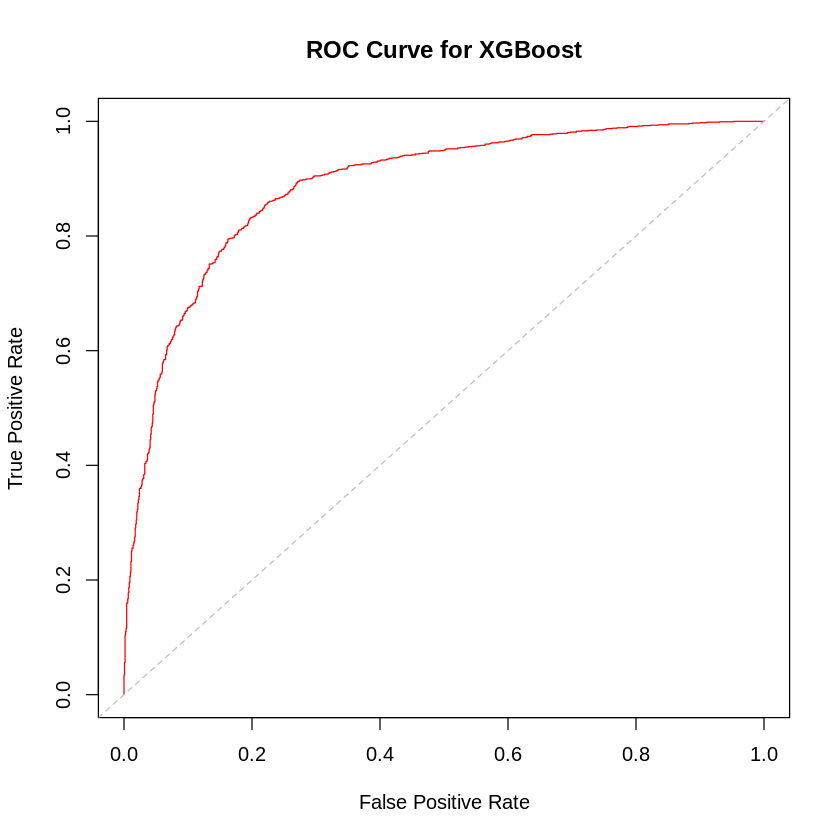

In [ ]:
x_test<-as.matrix(test_df[,c("turns","white_rating","black_rating","initial_time","rating_diff")])
dtest<-xgb.DMatrix(data=x_test)
xgb_probabilities<-predict(boosting_model,newdata=dtest)
roc_prediction<-prediction(xgb_probabilities,test_df$winner_numeric)
roc_performance<-performance(roc_prediction,"tpr","fpr")
plot(roc_performance,col="red",main="ROC Curve for XGBoost",xlab="False Positive Rate",ylab="True Positive Rate")
abline(a=0,b=1,lty=2,col="gray")